In [889]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import OrderedDict
import residuals as r

%matplotlib inline
import matplotlib.gridspec as gridspec
plt.rcParams['font.family']='serif'

micro = 10**(6)

from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable

from images2gif import writeGif
from PIL import Image
import os

In [873]:
def weighted_stddev(values, errors):
    '''
    Return the weighted average and standard deviation.

    '''
    weights = 1. / ((errors)**2)
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (math.sqrt(variance))

def magnitude(x):
    '''
    Return the magnitude of a variable
    '''
    var = float(x)
    return int(math.floor(math.log10(var)))

In [ ]:
###########################################
###########################################
#Switching over to resid2.tmp files
#Creating sublplots for L-band (1-2 GHz), S-band (2-4 GHz), and 430 MHz band (0.3-1 GHz)

In [3]:

#Define the colormap

from matplotlib.colors import LinearSegmentedColormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap=LinearSegmentedColormap.from_list('name', colors, 8)

#setting tick numbers for the colorbar too
from matplotlib import ticker

tick_locator = ticker.MaxNLocator(nbins=9)

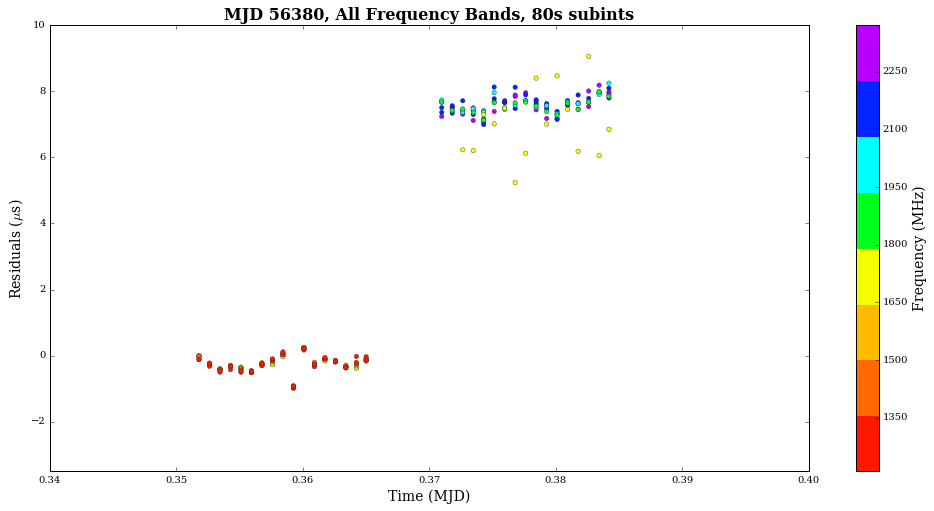

In [855]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56380_80F8.tmp")

date = 56380

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter((x.bary_TOA - date), micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_xlim(0.34, 0.4)
ax.set_ylim(-3.5, 10)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.set_title('MJD 56380, All Frequency Bands, 80s subints', fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')


plt.show()

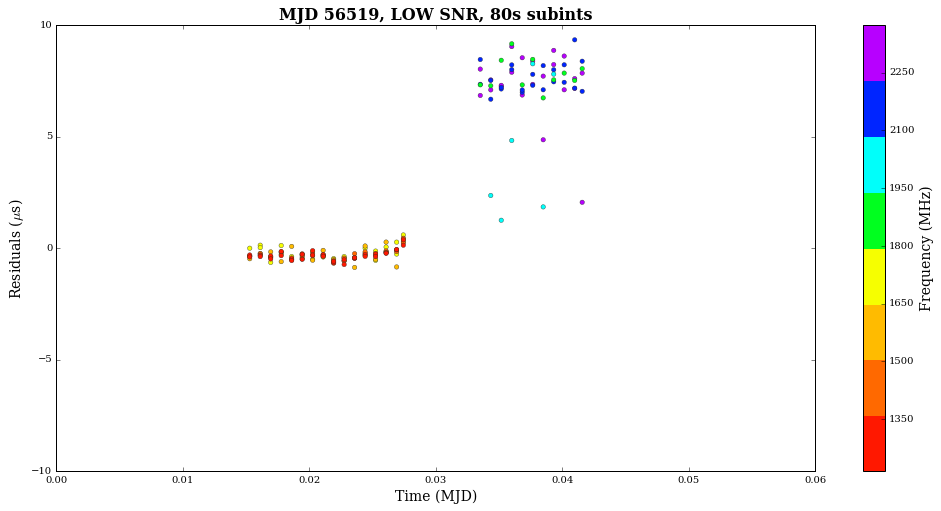

In [860]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56519_80F8.tmp")

date = 56519

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter((x.bary_TOA - date), micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_xlim(0, 0.06)
ax.set_ylim(-10, 10)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.set_title('MJD 56519, LOW SNR, 80s subints', fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')


plt.show()

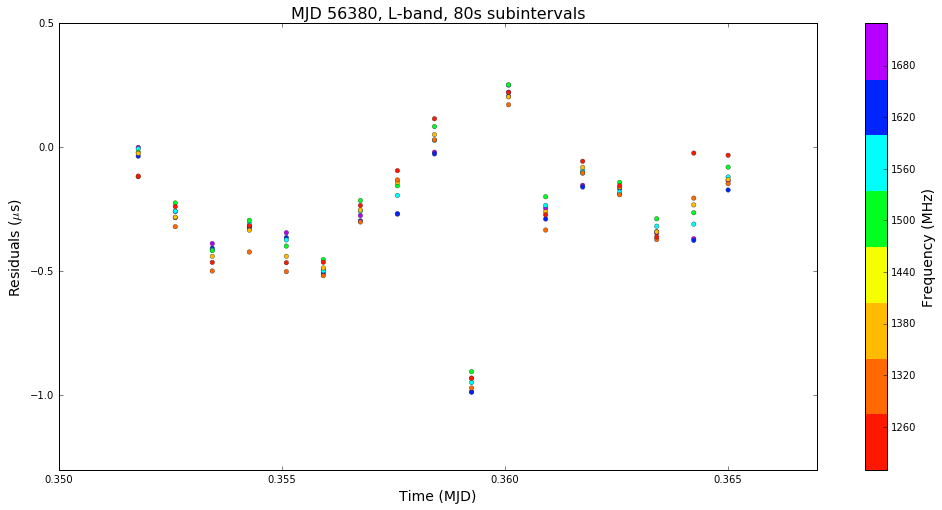

In [663]:
#Now imitating Michael's plots with the lines, looks like he's focusing on the bottom left TOA batch.
#Turns out when using all frequency bands, this section is entirely within the L-band.

x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56380_80F8.tmp")

date = 56380
condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
# ax.errorbar(x.bary_TOA[condition] - date, 
#             micro*(x.prefit_sec[condition]),
#             yerr=x.uncertainty[condition], fmt="none",
#             marker="none")
ax.set_title('MJD 56380, L-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.35, 0.367)
ax.set_ylim(-1.3, 0.5)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

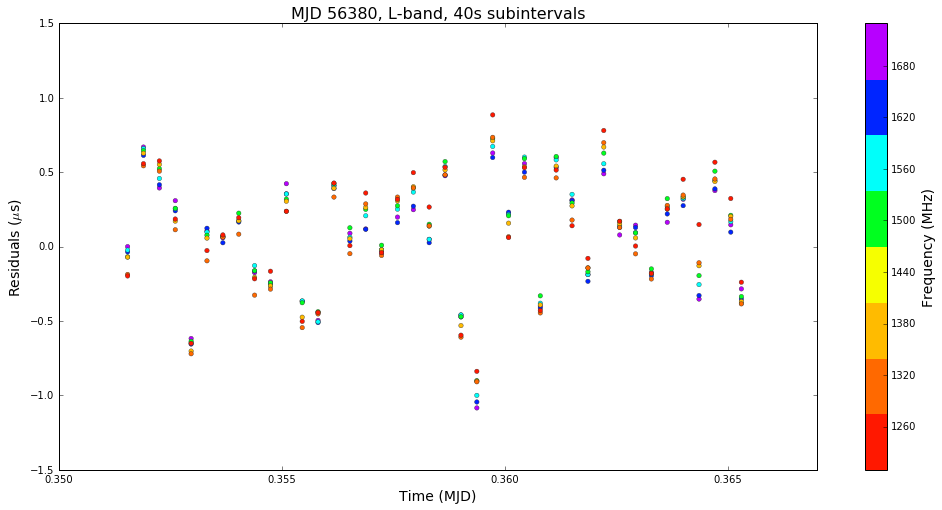

In [666]:
#Now imitating Michael's plots with the lines, looks like he's focusing on the bottom left TOA batch.
#Turns out when using all frequency bands, this section is entirely within the L-band.

x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56380_40F8.tmp")

date = 56380
condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
# ax.errorbar(x.bary_TOA[condition] - date, 
#             micro*(x.prefit_sec[condition]),
#             yerr=x.uncertainty[condition], fmt="none",
#             marker="none")
ax.set_title('MJD 56380, L-band, 40s subintervals', fontsize='16')
ax.set_xlim(0.35, 0.367)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

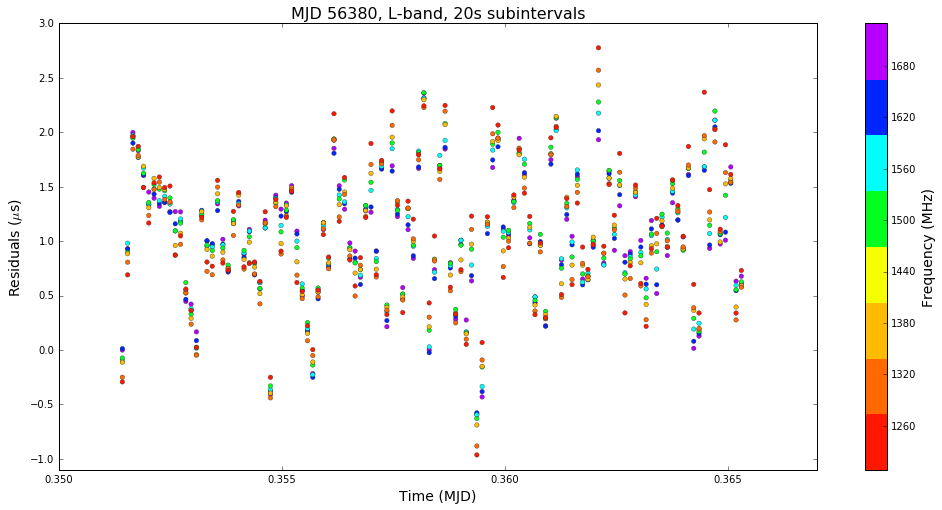

In [667]:
#Now imitating Michael's plots with the lines, looks like he's focusing on the bottom left TOA batch.
#Turns out when using all frequency bands, this section is entirely within the L-band.

x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56380_20F8.tmp")

date = 56380
condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
# ax.errorbar(x.bary_TOA[condition] - date, 
#             micro*(x.prefit_sec[condition]),
#             yerr=x.uncertainty[condition], fmt="none",
#             marker="none")
ax.set_title('MJD 56380, L-band, 20s subintervals', fontsize='16')
ax.set_xlim(0.35, 0.367)
ax.set_ylim(-1.1, 3.0)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

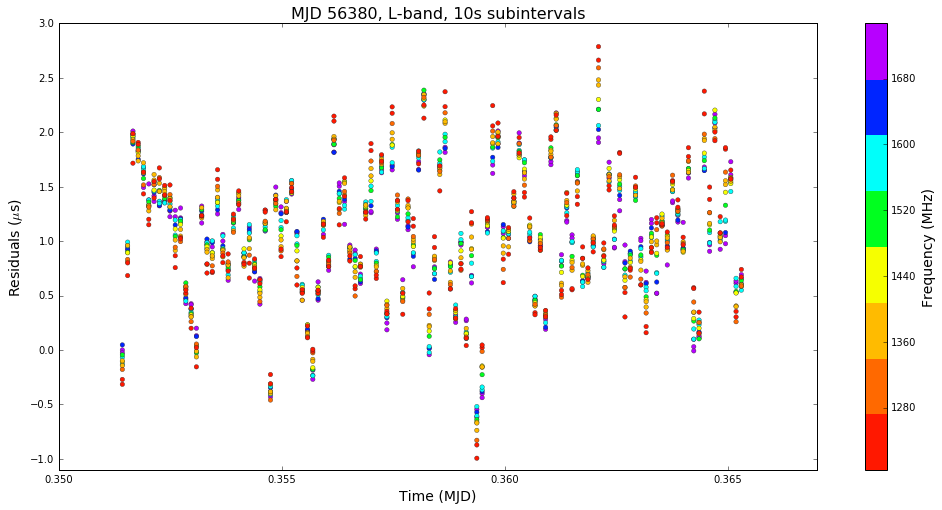

In [214]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56380_NTF8.tmp")

date = 56380
condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)
                   
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56380, L-band, 10s subintervals', fontsize='16')
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.set_xlim(0.35, 0.367)
ax.set_ylim(-1.1, 3.0)
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [676]:
print max(x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)])
print min(x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)])

1728.97654365
1210.08814288


In [ ]:
1725-1227

In [670]:
498/8

62

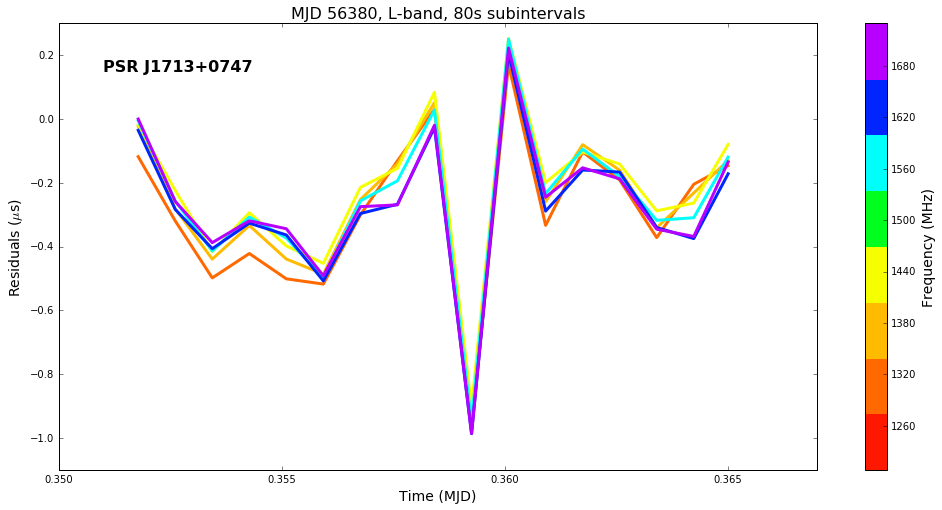

In [695]:
#Create a plot that goes up by increments of 62 and then plots each line as a different color.
#This uses the same section as the Lam plot

x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56380_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 8)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date = 56380
condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1227
m = 1289
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56380, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.35, 0.367)
    ax.set_ylim(-1.1, 0.3)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+62
    m=m+62
ax.annotate('PSR J1713+0747', xy=(0.351,0.15), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.savefig('products/J1713+0747_56380_80s.jpg')
plt.show()

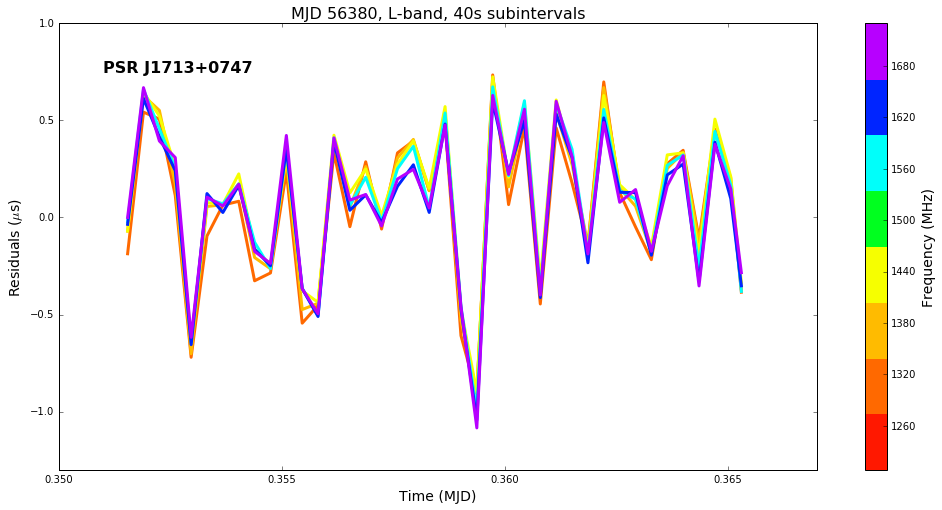

In [694]:
#Create a plot that goes up by increments of 62 and then plots each line as a different color.
#This uses the same section as the Lam plot

x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56380_40F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 8)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date = 56380
condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1227
m = 1289
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56380, L-band, 40s subintervals', fontsize='16')
    ax.set_xlim(0.35, 0.367)
    ax.set_ylim(-1.3, 1)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+62
    m=m+62
ax.annotate('PSR J1713+0747', xy=(0.351,0.75), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.savefig('products/J1713+0747_56380_40s.jpg')
plt.show()

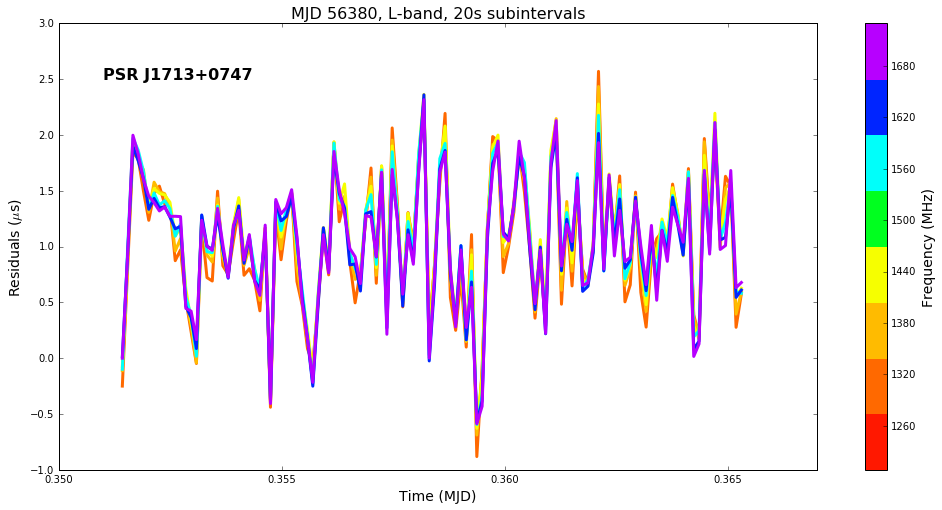

In [693]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56380_20F8.tmp")

condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)
date=56380

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1227
m = 1289
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56380, L-band, 20s subintervals', fontsize='16')
    ax.set_xlim(0.35, 0.367)
    ax.set_ylim(-1.0, 3.0)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+62
    m=m+62
ax.annotate('PSR J1713+0747', xy=(0.351,2.5), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.savefig('products/J1713+0747_56380_20s.jpg')
plt.show()

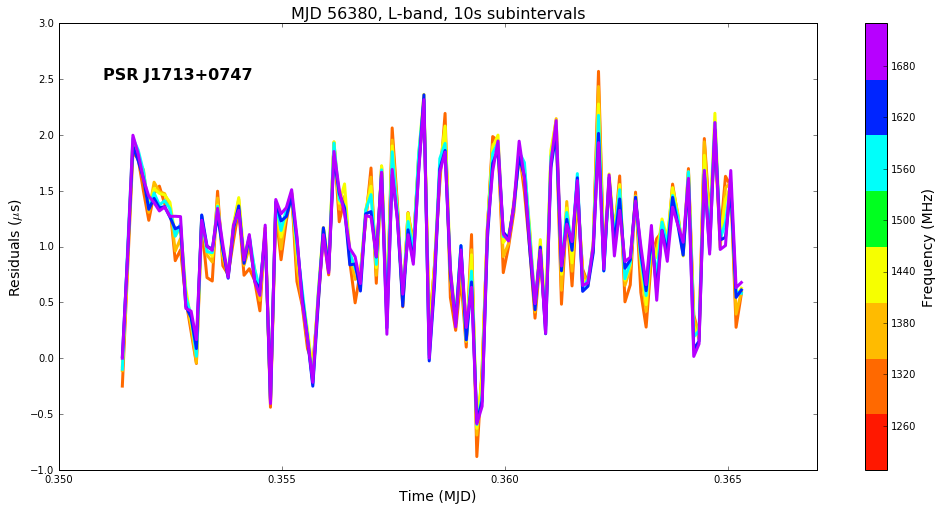

In [692]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56380_NTF8.tmp")

condition=(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)
date=56380

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1227
m = 1289
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56380, L-band, 10s subintervals', fontsize='16')
    ax.set_xlim(0.35, 0.367)
    ax.set_ylim(-1.0, 3.0)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+62
    m=m+62
ax.annotate('PSR J1713+0747', xy=(0.351,2.5), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.savefig('products/J1713+0747_56380_10s.jpg')
plt.show()

In [ ]:
## =============================
## Running on the highest SNR day for J1713
## =============================

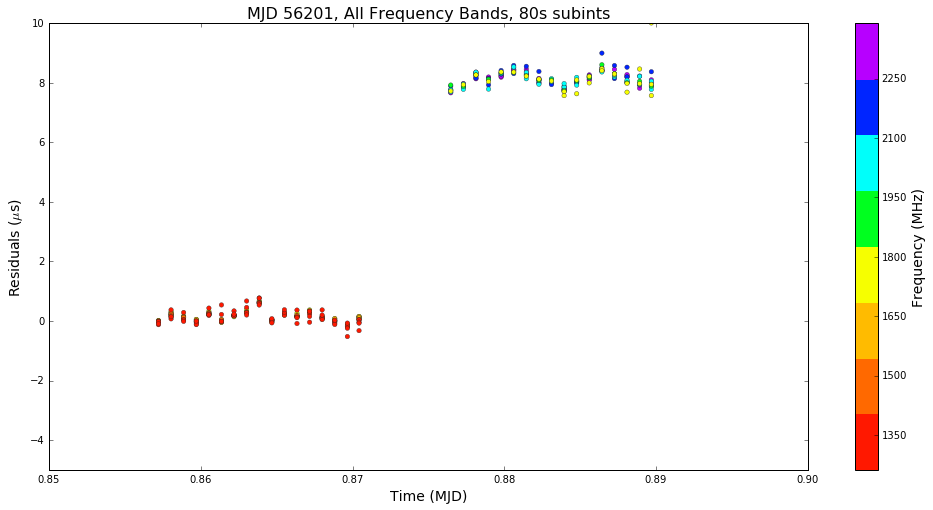

In [217]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56201_80F8.tmp")

date=56201

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56201, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.85, 0.9)
ax.set_ylim(-5.0, 10)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

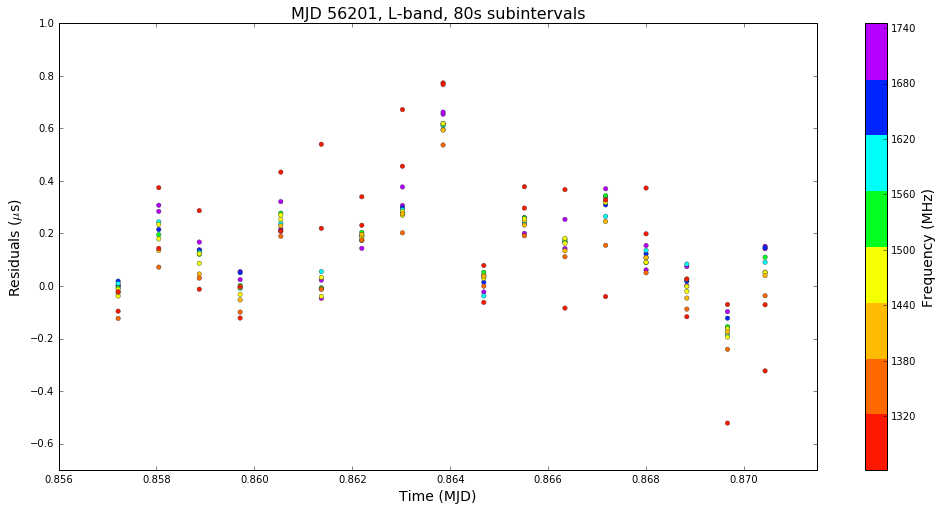

In [218]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56201_80F8.tmp")

condition=(x.bary_TOA > 56201.85) & (x.bary_TOA < 56201.872)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56201, L-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.856, 0.8715)
ax.set_ylim(-0.7, 1.0)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

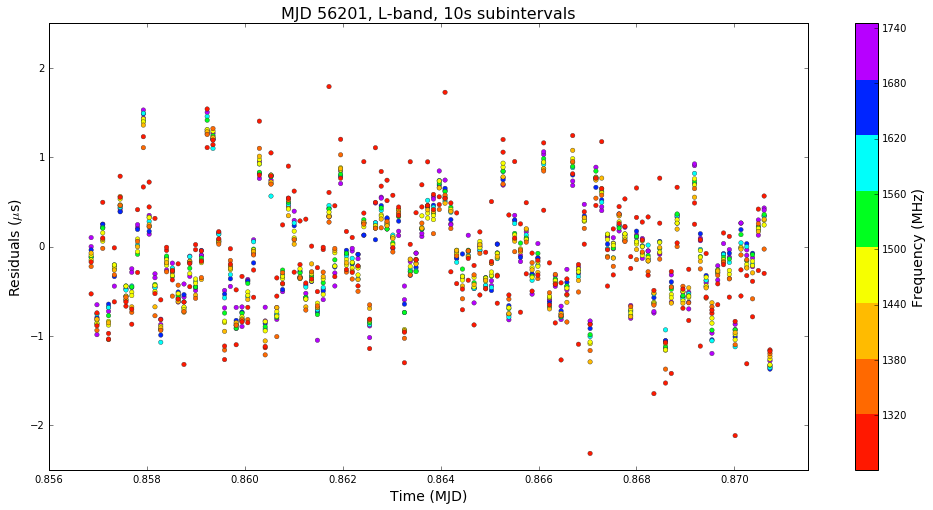

In [219]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56201_NTF8.tmp")

date = 56201
condition=(x.bary_TOA > 56201.85) & (x.bary_TOA < 56201.872)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56201, L-band, 10s subintervals', fontsize='16')
ax.set_xlim(0.856, 0.8715)
ax.set_ylim(-2.5, 2.5)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [68]:
print max(x.bary_freq[condition])

print min(x.bary_freq[condition])

1744.97983341
1260.95783326


In [730]:
1745-1260
485/9

53

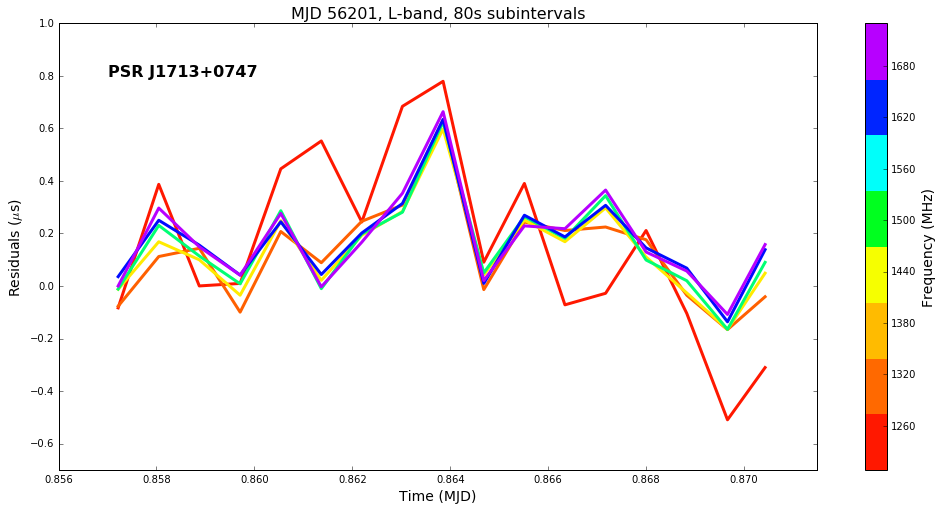

In [734]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56201_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=7)

date=56201
condition=(x.bary_TOA > 56201.856) & (x.bary_TOA < 56201.872)

TOA=x.bary_TOA[condition]-56201
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1260
m = 1310
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56201, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.856, 0.8715)
    ax.set_ylim(-0.7, 1.0)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+50
    m=m+50
ax.annotate('PSR J1713+0747', xy=(0.857,0.8), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.savefig('J1713+0747_80s_56201.jpg')
plt.show()

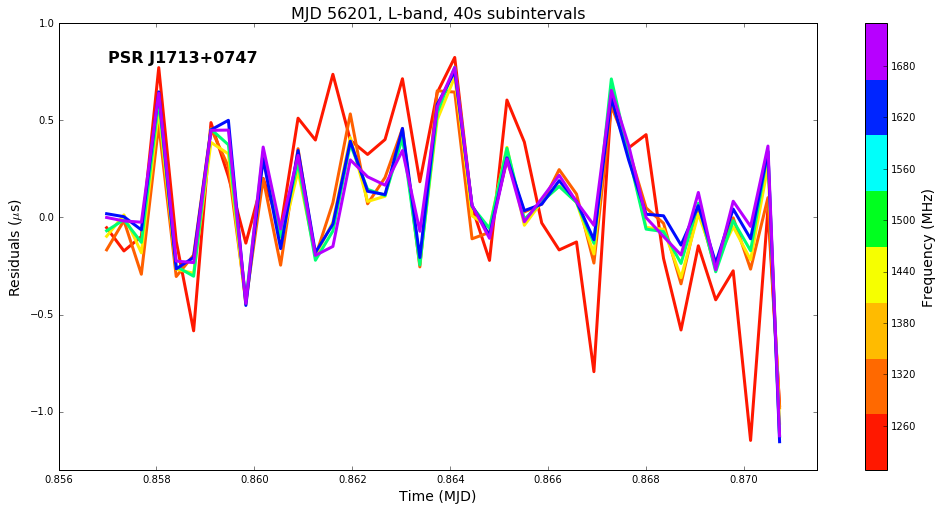

In [735]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56201_40F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=7)

date=56201
condition=(x.bary_TOA > 56201.856) & (x.bary_TOA < 56201.872)

TOA=x.bary_TOA[condition]-56201
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1260
m = 1310
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56201, L-band, 40s subintervals', fontsize='16')
    ax.set_xlim(0.856, 0.8715)
    ax.set_ylim(-1.3, 1.0)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+50
    m=m+50
ax.annotate('PSR J1713+0747', xy=(0.857,0.8), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.savefig('J1713+0747_40s_56201.jpg')
plt.show()

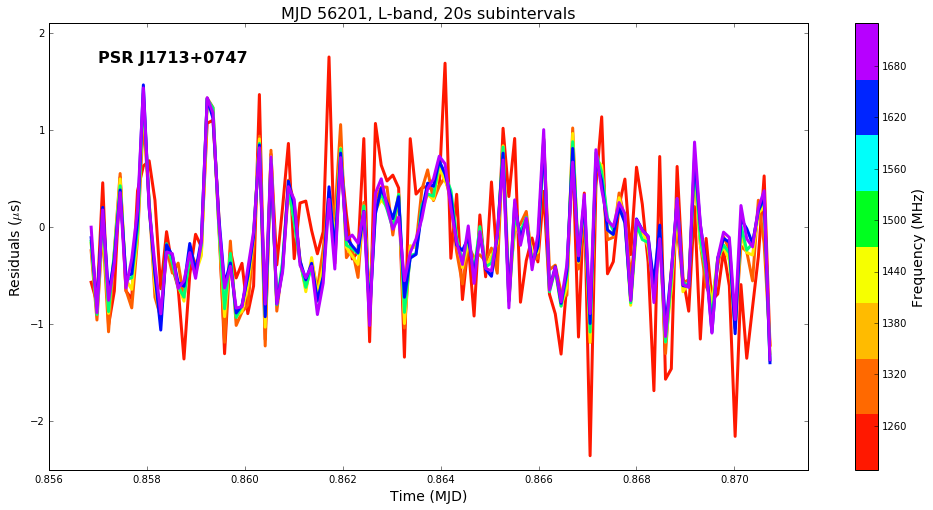

In [736]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56201_20F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=7)

date=56201
condition=(x.bary_TOA > 56201.856) & (x.bary_TOA < 56201.872)

TOA=x.bary_TOA[condition]-56201
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1260
m = 1310
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56201, L-band, 20s subintervals', fontsize='16')
    ax.set_xlim(0.856, 0.8715)
    ax.set_ylim(-2.5, 2.1)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+50
    m=m+50
ax.annotate('PSR J1713+0747', xy=(0.857,1.7), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.savefig('J1713+0747_20s_56201.jpg')
plt.show()

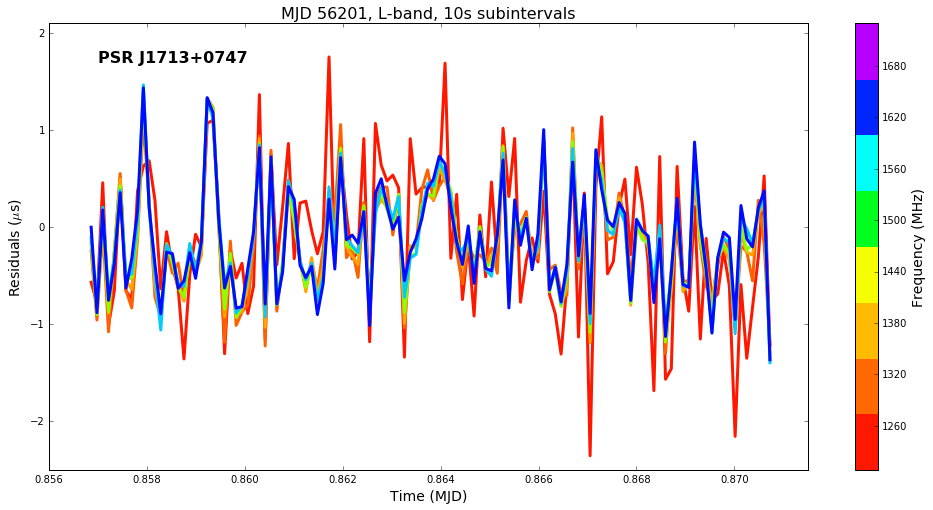

In [724]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1713+0747_resid_56201_NTF8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=7)

date=56201
condition=(x.bary_TOA > 56201.856) & (x.bary_TOA < 56201.872)

TOA=x.bary_TOA[condition]-56201
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1260
m = 1320
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56201, L-band, 10s subintervals', fontsize='16')
    ax.set_xlim(0.856, 0.8715)
    ax.set_ylim(-2.5, 2.1)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+60
    m=m+60
ax.annotate('PSR J1713+0747', xy=(0.857,1.7), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.savefig('J1713+0747_10s_56201.jpg')
plt.show()

In [103]:
## =============================
## Running on the highest SNR (and flux) day for B1937
## =============================

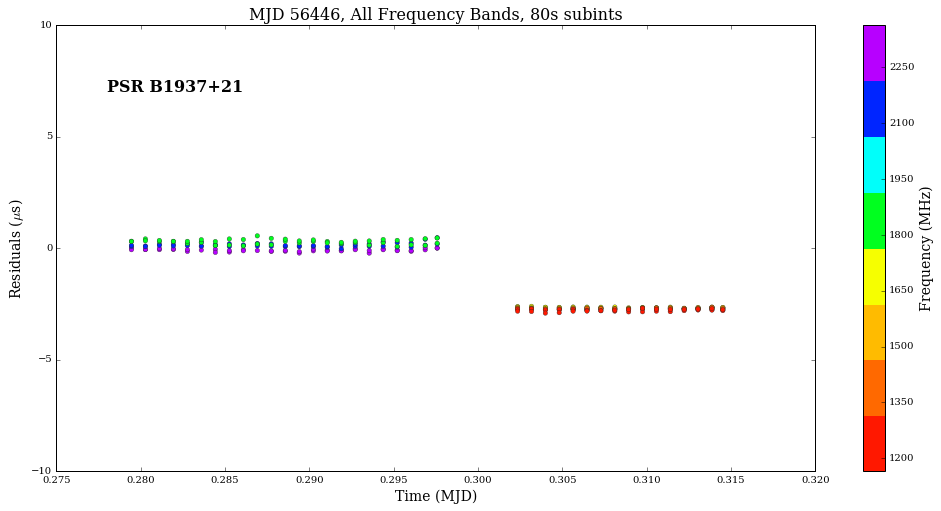

In [861]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/B1937+21_resid_56465_80F8.tmp")

date = 56465

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56446, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.275, 0.32)
ax.set_ylim(-10, 10)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR B1937+21', xy=(0.278, 7), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

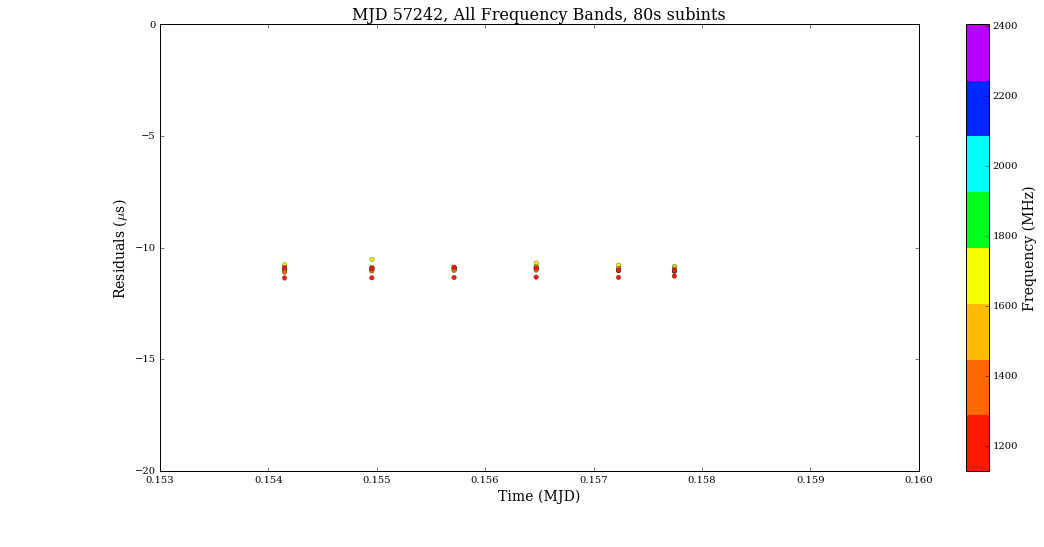

In [870]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/B1937+21_resid_57242_80F8.tmp")

date = 57242

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57242, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.153, 0.16)
ax.set_ylim(-20, 0)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR B1937+21', xy=(0.278, 7), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

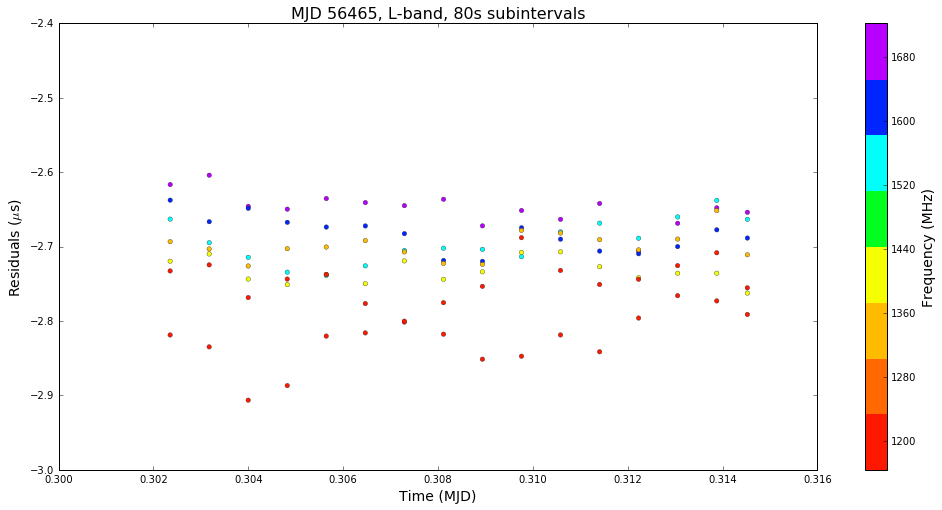

In [242]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/B1937+21_resid_56465_80F8.tmp")

date=56465
condition=(x.bary_TOA > 56465.3) & (x.bary_TOA < 56465.32)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56465, L-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.3, 0.316)
ax.set_ylim(-3, -2.4)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

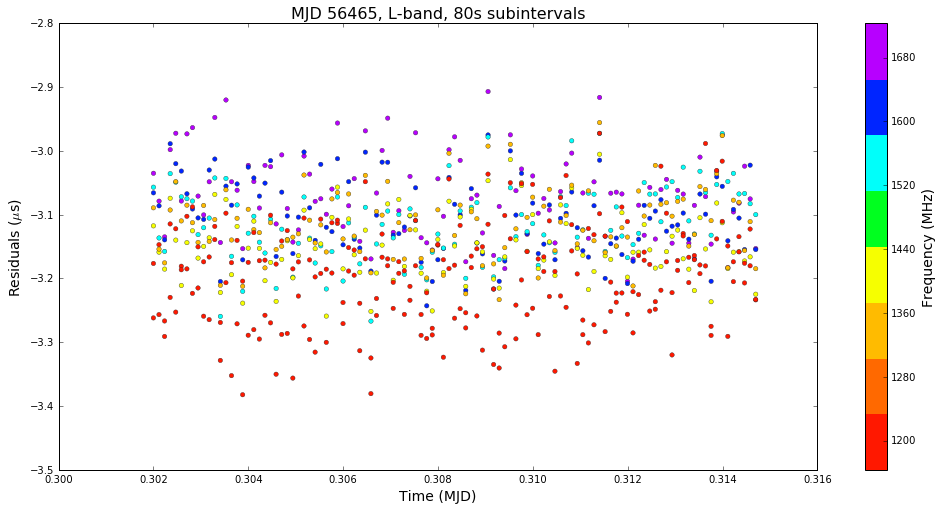

In [238]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/B1937+21_resid_56465_NTF8.tmp")

date=56465
condition=(x.bary_TOA > 56465.3) & (x.bary_TOA < 56465.32)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56465, L-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.3, 0.316)
ax.set_ylim(-3.5, -2.8)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [145]:
print max(x.bary_freq[condition])

print min(x.bary_freq[condition])

1764.30957016
1150.26922471


In [147]:
1764-1150

614

In [246]:
614/9

68

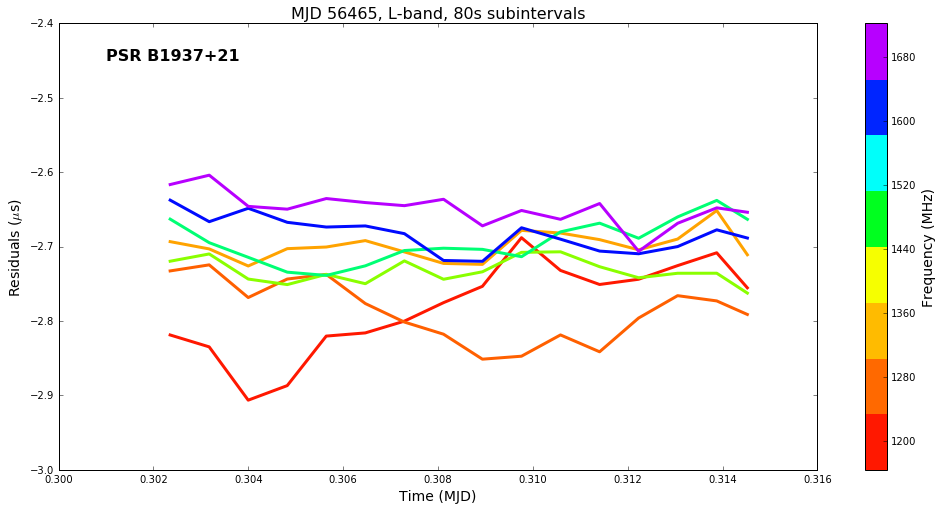

In [253]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/B1937+21_resid_56465_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date=56465
condition=(x.bary_TOA > 56465.3) & (x.bary_TOA < 56465.32)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1150
m = 1218
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56465, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.3, 0.316)
    ax.set_ylim(-3, -2.4)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+68
    m=m+68
ax.annotate('PSR B1937+21', xy=(0.301,-2.45), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

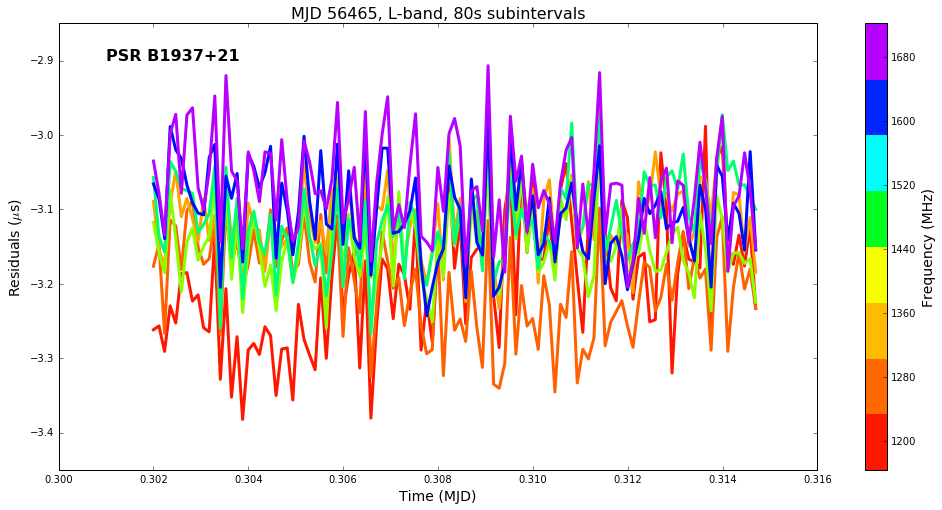

In [254]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/B1937+21_resid_56465_NTF8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date=56465
condition=(x.bary_TOA > 56465.3) & (x.bary_TOA < 56465.32)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1150
m = 1218
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56465, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.3, 0.316)
    ax.set_ylim(-3.45, -2.85)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+68
    m=m+68
ax.annotate('PSR B1937+21', xy=(0.301,-2.9), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

In [255]:
## =============================
## Running on the highest flux day for J1022
## =============================

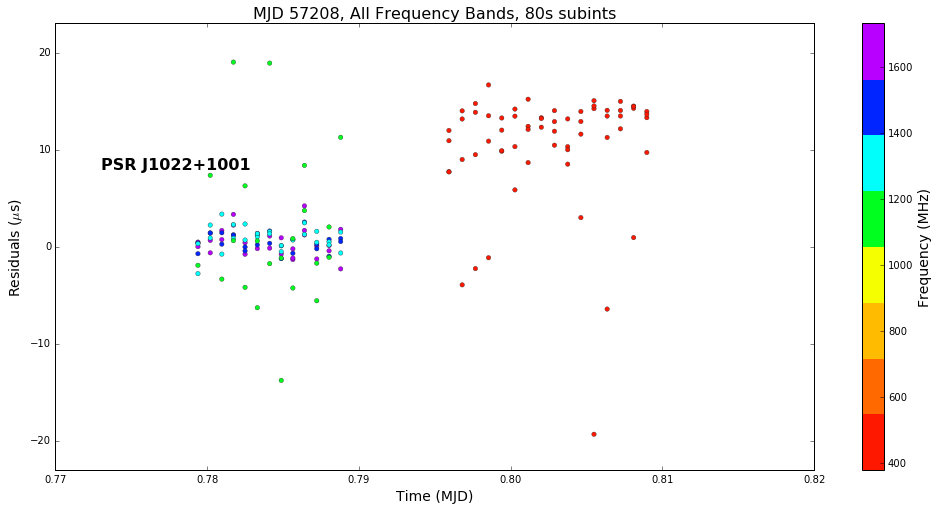

In [414]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1022+1001_resid_57208_80F8.tmp")

date = 57208

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57208, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.77, 0.82)
ax.set_ylim(-23, 23)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J1022+1001', xy=(0.773, 8), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

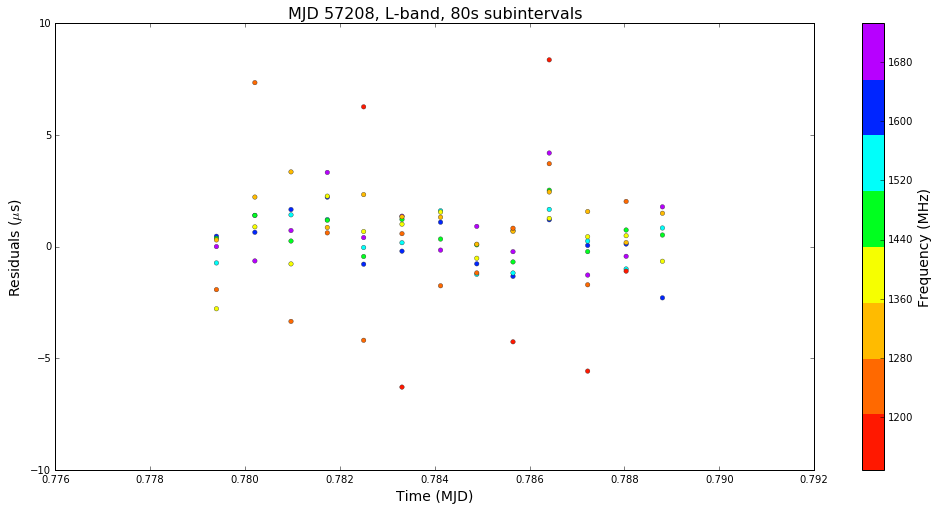

In [286]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1022+1001_resid_57208_80F8.tmp")

date = 57208
condition=(x.bary_TOA > 57208.77) & (x.bary_TOA < 57208.792)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57208, L-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.776, 0.792)
ax.set_ylim(-10, 10)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

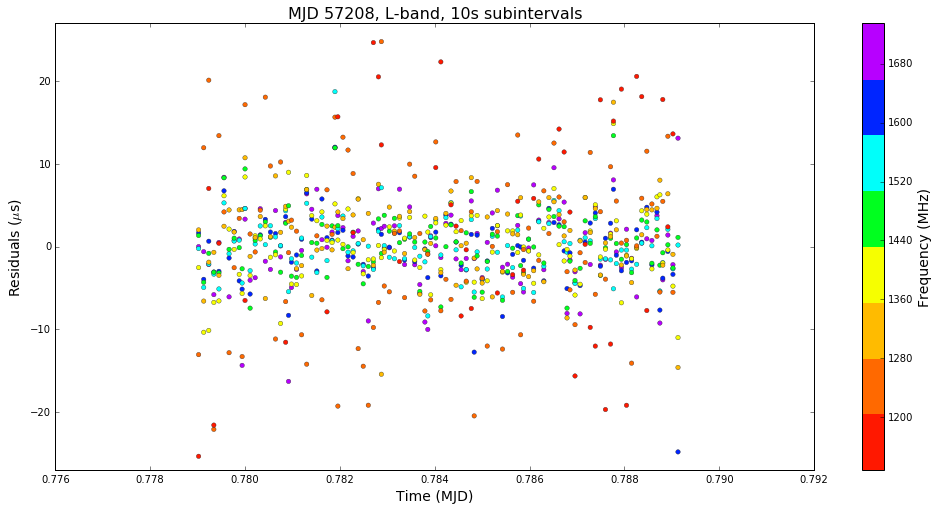

In [292]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1022+1001_resid_57208_NTF8.tmp")

date = 57208
condition=(x.bary_TOA > 57208.77) & (x.bary_TOA < 57208.792)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57208, L-band, 10s subintervals', fontsize='16')
ax.set_xlim(0.776, 0.792)
ax.set_ylim(-27, 27)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [280]:
print max(x.bary_freq[condition])

print min(x.bary_freq[condition])

1734.49632149
1128.86391239


In [282]:
1734-1128

606

In [284]:
606/9
1128+67

1195

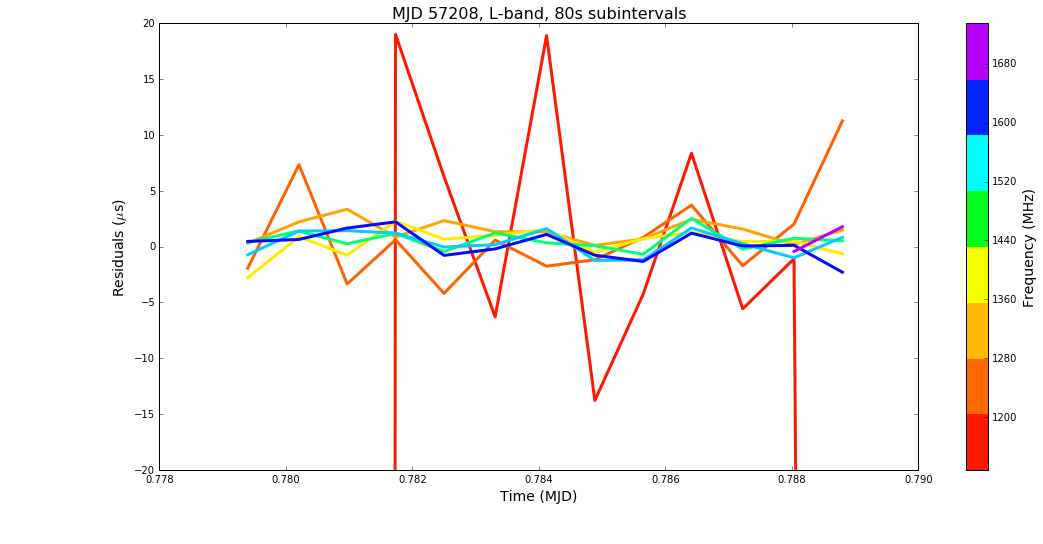

In [298]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1022+1001_resid_57208_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date=57208
condition=(x.bary_TOA > 57208.77) & (x.bary_TOA < 57208.7894)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1128
m = 1195
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57208, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.778, 0.79)
    ax.set_ylim(-20, 20)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+67
    m=m+67
ax.annotate('PSR J1022+1001', xy=(0.777, 8), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

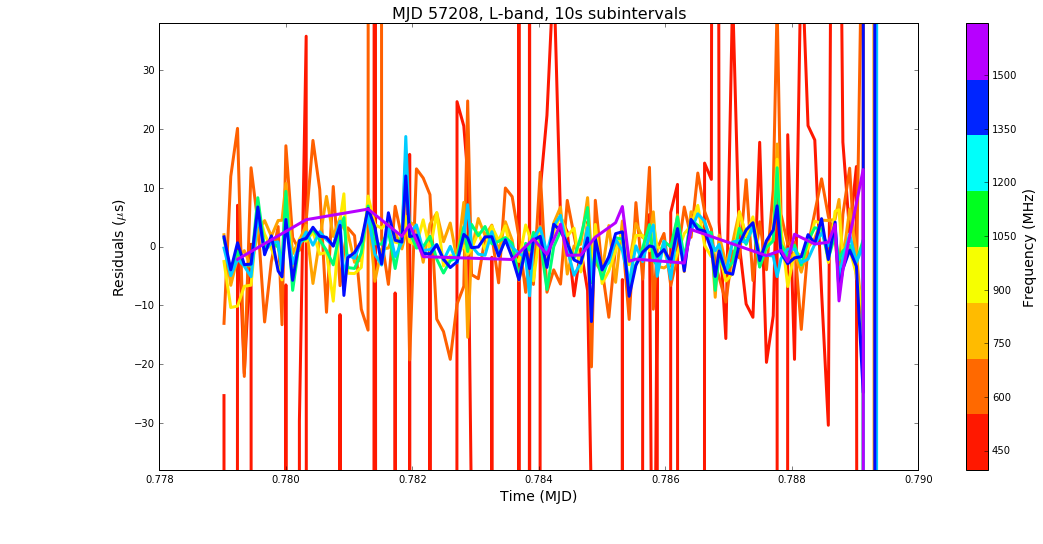

In [370]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1022+1001_resid_57208_NTF8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date=57208
condition=(x.bary_TOA > 57208.77) & (x.bary_TOA < 57208.7894)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1128
m = 1195
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57208, L-band, 10s subintervals', fontsize='16')
    ax.set_xlim(0.778, 0.79)
    ax.set_ylim(-38, 38)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+67
    m=m+67
ax.annotate('PSR J1022+1001', xy=(0.777, 8), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

In [372]:
## =============================
## Running on the highest flux day for J1022
## =============================

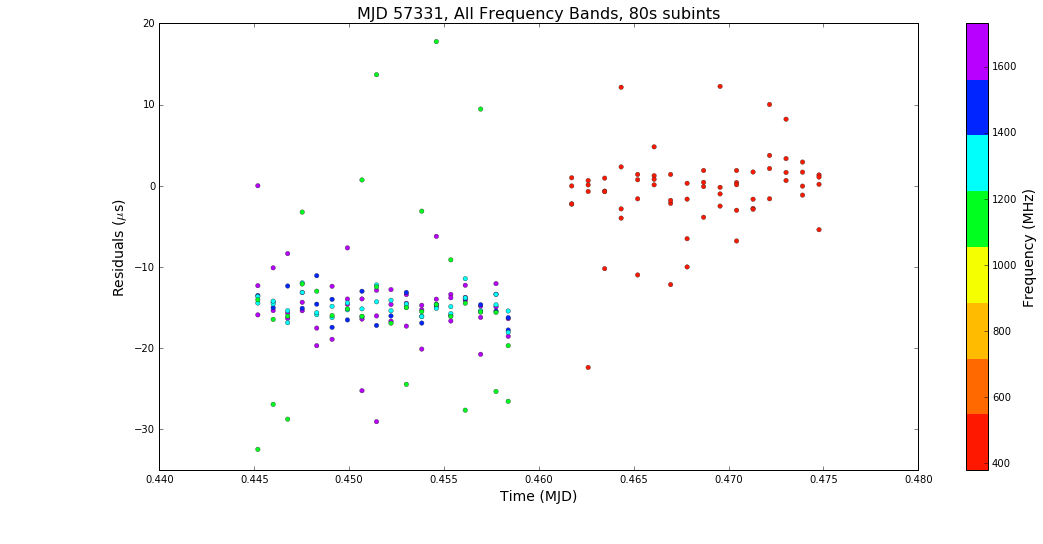

In [380]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1022+1001_resid_57331_80F8.tmp")

date = 57331

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57331, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.44, 0.48)
ax.set_ylim(-35, 20)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J1022+1001', xy=(0.773, 8), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

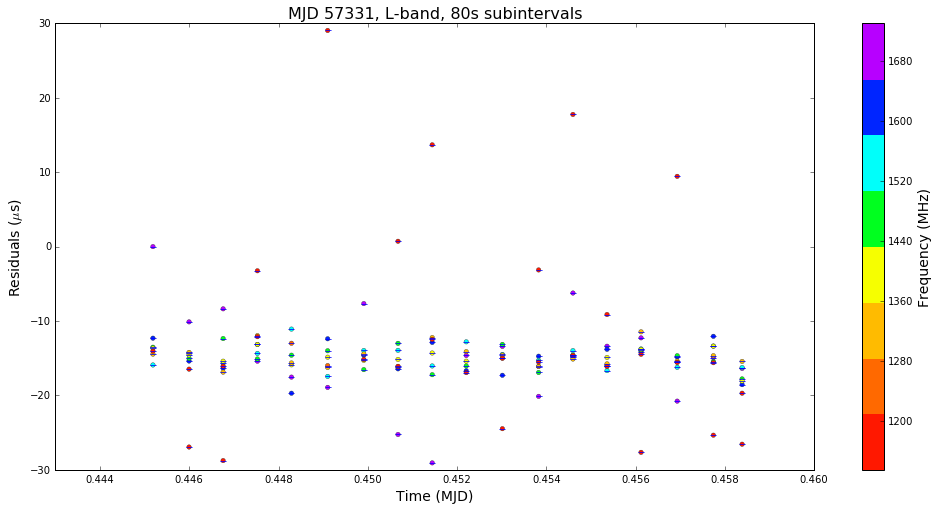

0.000107749689847
7.53634961104e-05


In [429]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1022+1001_resid_57331_80F8.tmp")

date = 57331
condition=(x.bary_TOA > 57331.443) & (x.bary_TOA < 57331.4595)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.errorbar(x.bary_TOA[condition] - date, 
            micro*(x.prefit_sec[condition]),
            yerr=x.uncertainty[condition], fmt="none",
            marker="none", elinewidth=8)
ax.set_title('MJD 57331, L-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.443, 0.460)
ax.set_ylim(-30, 30)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()
print max(x.uncertainty)

print max(x.prefit_sec[condition]) - min(x.prefit_sec[condition])

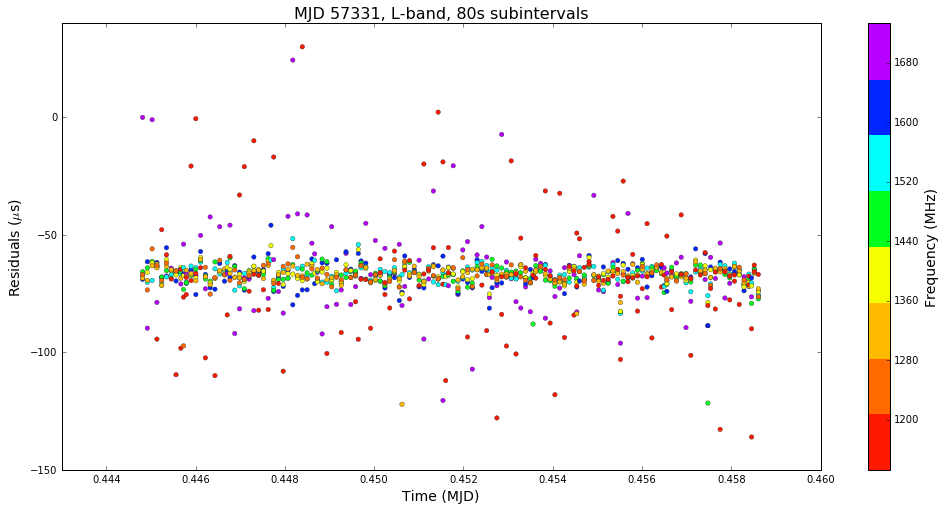

In [391]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1022+1001_resid_57331_NTF8.tmp")

date = 57331
condition=(x.bary_TOA > 57331.443) & (x.bary_TOA < 57331.4595)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57331, L-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.443, 0.460)
ax.set_ylim(-150, 40)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [404]:
dumprange = max(x.bary_freq[condition]) - min(x.bary_freq[condition])
print "range=" + str(dumprange)
interval = range / 9
print "interval=" + str(interval)
print min(x.bary_freq[condition])
print min(x.bary_freq[condition]) + interval

range=594.964991489
interval=66.7093762402
1135.58595313
1202.29532937


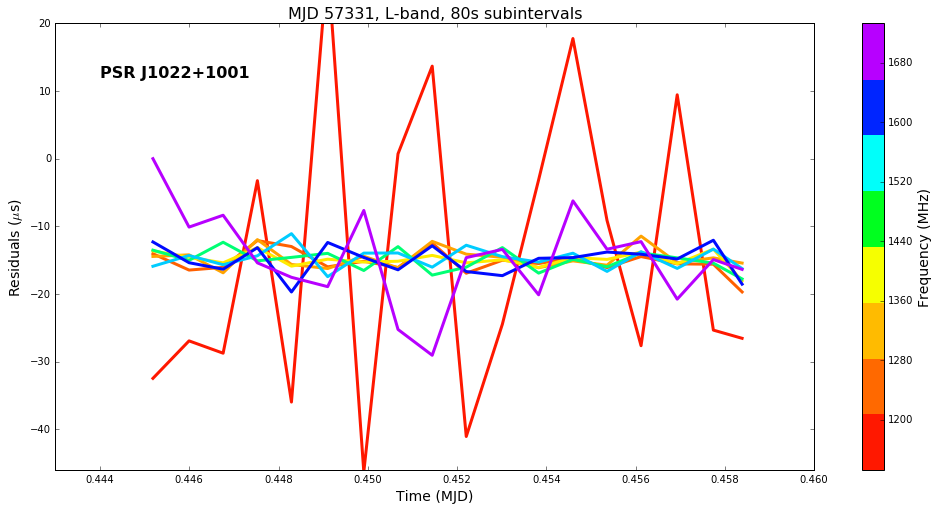

In [409]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1022+1001_resid_57331_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date = 57331
condition=(x.bary_TOA > 57331.443) & (x.bary_TOA < 57331.4595)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1132
m = 1199
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57331, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.443, 0.460)
    ax.set_ylim(-46, 20)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+67
    m=m+67
ax.annotate('PSR J1022+1001', xy=(0.444, 12), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

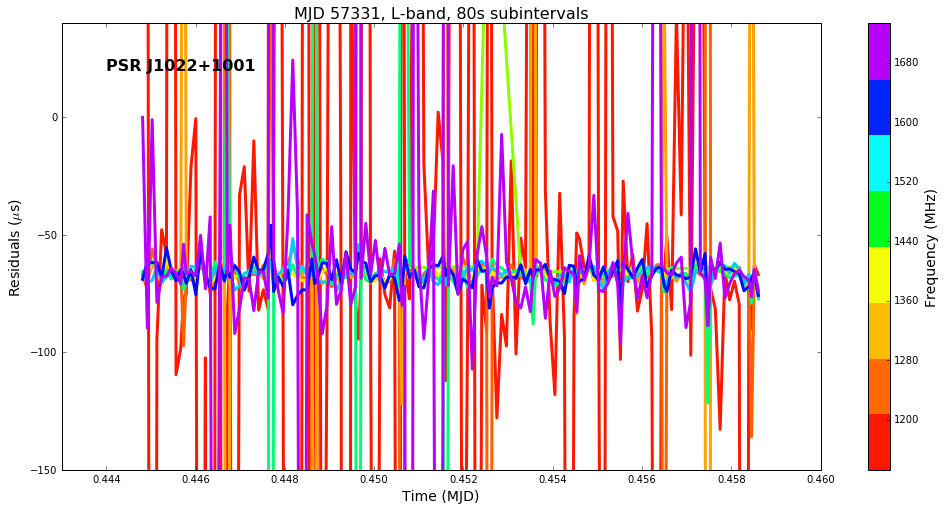

In [411]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1022+1001_resid_57331_NTF8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date = 57331
condition=(x.bary_TOA > 57331.443) & (x.bary_TOA < 57331.4595)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1132
m = 1199
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57331, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.443, 0.460)
    ax.set_ylim(-150, 40)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+67
    m=m+67
ax.annotate('PSR J1022+1001', xy=(0.444, 20), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

In [ ]:
## =============================
## Running on the highest flux day for J2317+1439
## =============================

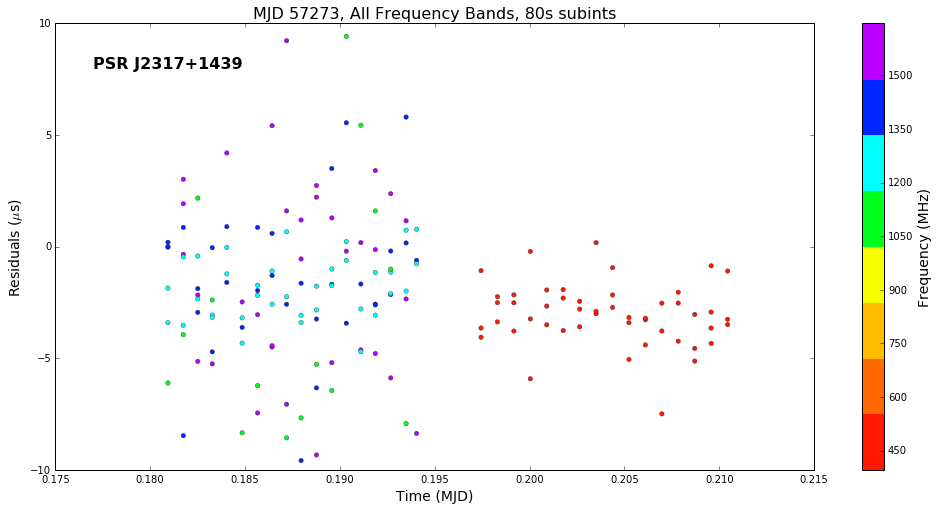

In [321]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2317+1439_resid_57273_80F8.tmp")

date = 57273

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57273, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.175, 0.215)
ax.set_ylim(-10, 10)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J2317+1439', xy=(0.177, 8), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

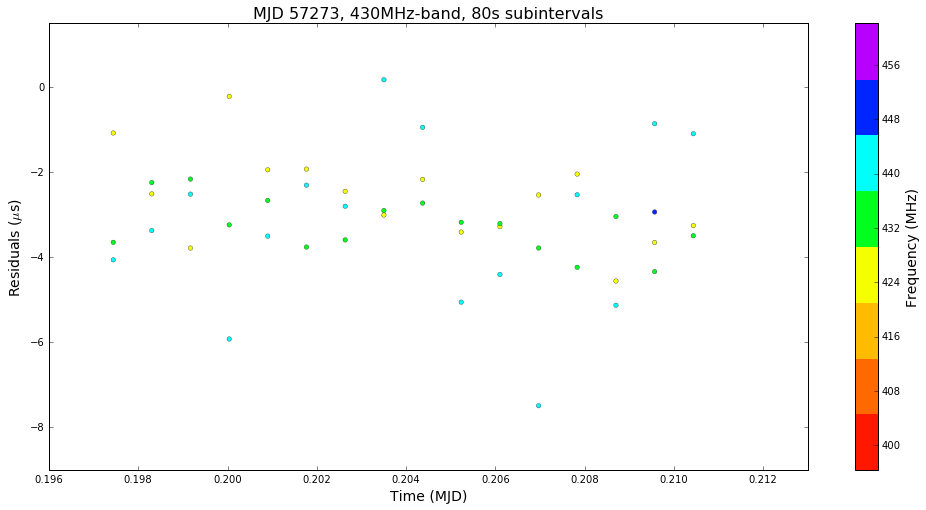

In [316]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2317+1439_resid_57273_80F8.tmp")

date = 57273
condition=(x.bary_TOA > 57273.196) & (x.bary_TOA < 57273.217)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57273, 430MHz-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.196, 0.213)
ax.set_ylim(-9, 1.5)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

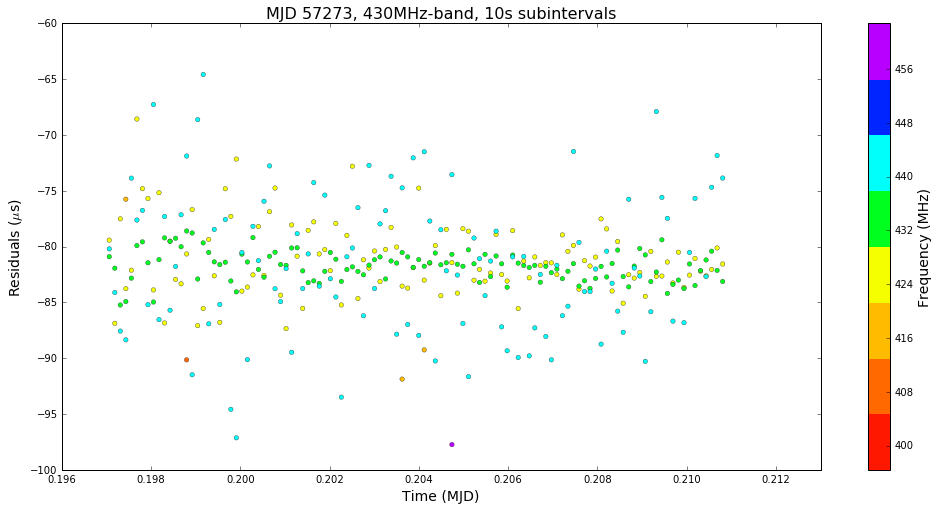

In [656]:
## Something weird has happened with the NTF8 resdiuals?

x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2317+1439_resid_57273_NTF8.tmp")

date = 57273
condition=(x.bary_TOA > 57273.196) & (x.bary_TOA < 57273.217)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57273, 430MHz-band, 10s subintervals', fontsize='16')
ax.set_xlim(0.196, 0.213)
ax.set_ylim(-100, -60)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [320]:
## =============================
## Running on the highest flux day for J2234+09
## =============================

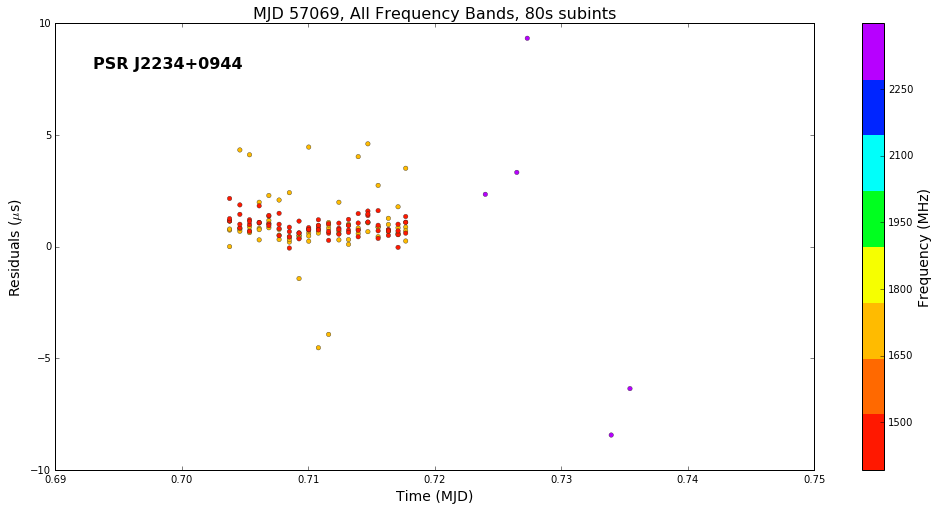

In [326]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2234+0944_resid_57069_80F8.tmp")

date = 57069

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57069, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.69, 0.75)
ax.set_ylim(-10, 10)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J2234+0944', xy=(0.693, 8), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

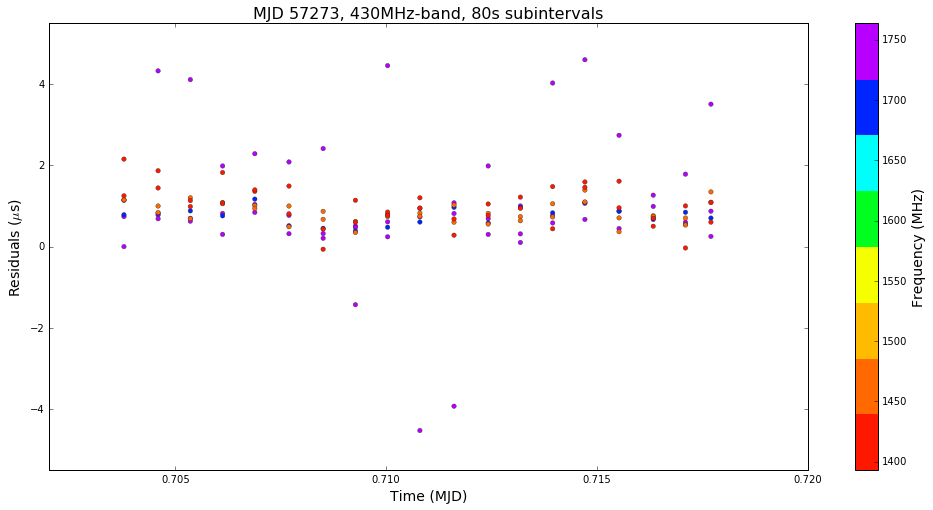

In [328]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2234+0944_resid_57069_80F8.tmp")

date = 57069
condition=(x.bary_TOA > 57069.7) & (x.bary_TOA < 57069.72)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57273, 430MHz-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.702, 0.72)
ax.set_ylim(-5.5, 5.5)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

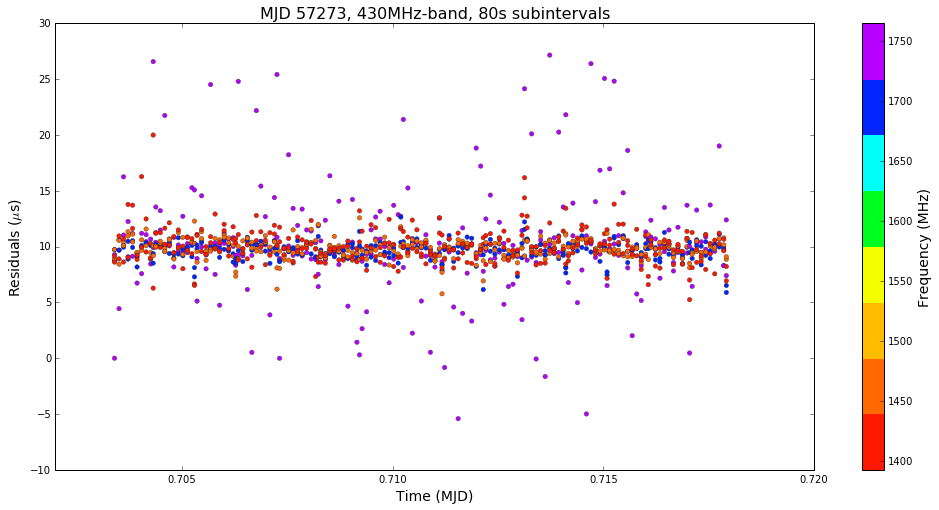

In [332]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2234+0944_resid_57069_NTF8.tmp")

date = 57069
condition=(x.bary_TOA > 57069.7) & (x.bary_TOA < 57069.72)

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57273, 430MHz-band, 80s subintervals', fontsize='16')
ax.set_xlim(0.702, 0.72)
ax.set_ylim(-10, 30)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [334]:
print max(x.bary_freq[condition])

print min(x.bary_freq[condition])

1765.04932164
1392.53874389


In [344]:
1765-1392
373/8
1392+46

1438

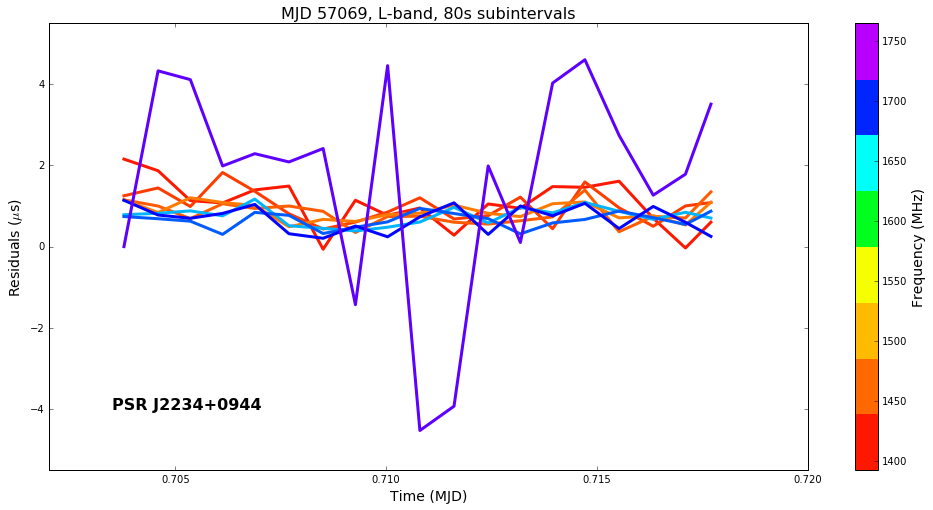

In [360]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2234+0944_resid_57069_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 18)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date = 57069
condition=(x.bary_TOA > 57069.7) & (x.bary_TOA < 57069.72)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1392
m = 1415
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,18):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57069, L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(0.702, 0.72)
    ax.set_ylim(-5.5, 5.5)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+23
    m=m+23
ax.annotate('PSR J2234+0944', xy=(0.7035, -4), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

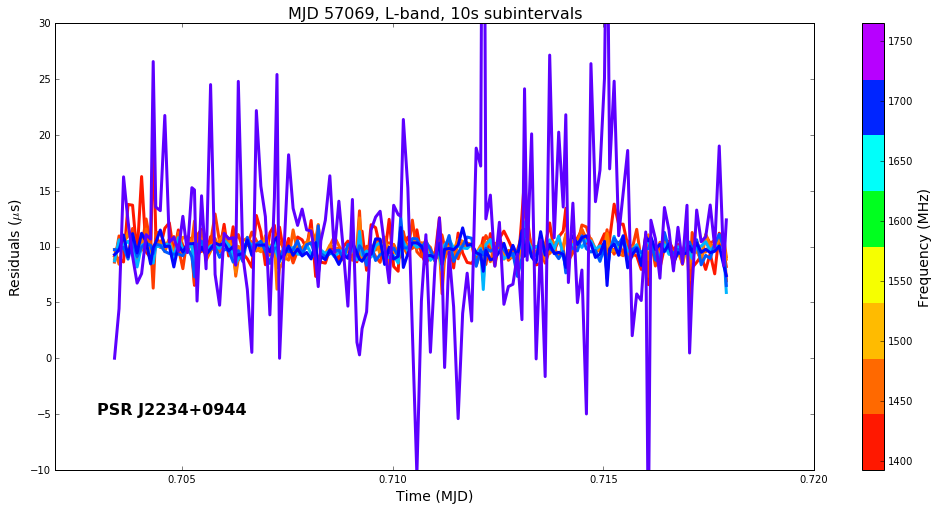

In [361]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2234+0944_resid_57069_NTF8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 18)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date = 57069
condition=(x.bary_TOA > 57069.7) & (x.bary_TOA < 57069.72)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1392
m = 1415
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,18):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57069, L-band, 10s subintervals', fontsize='16')
    ax.set_xlim(0.702, 0.72)
    ax.set_ylim(-10, 30)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+23
    m=m+23
ax.annotate('PSR J2234+0944', xy=(0.703, -5), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

In [362]:
## =============================
## Running on the highest flux day for J1640+2224
## =============================

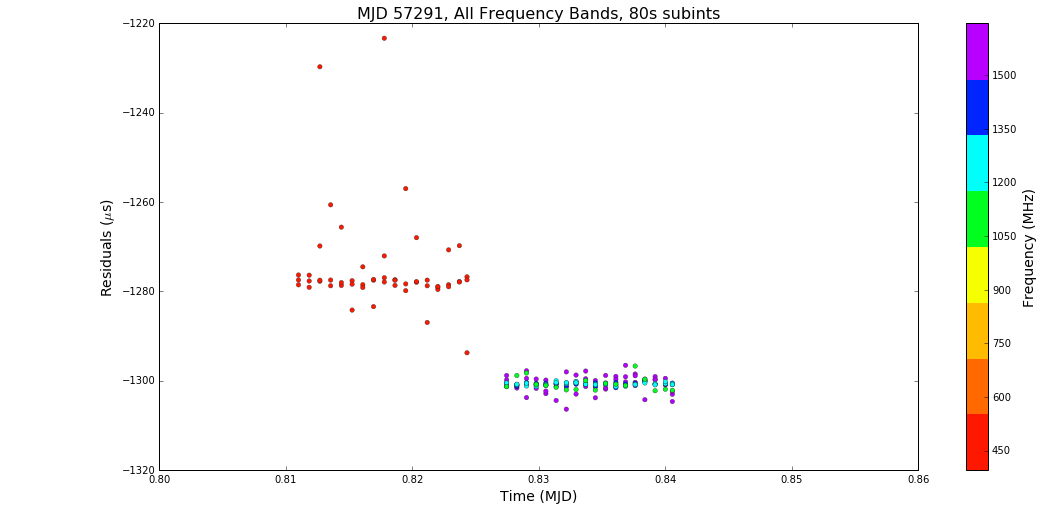

In [559]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1640+2224_resid_57291_80F8.tmp")

date = 57291

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57291, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.8, 0.86)
ax.set_ylim(-1320, -1220)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J1640+2224', xy=(0.802, 75), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

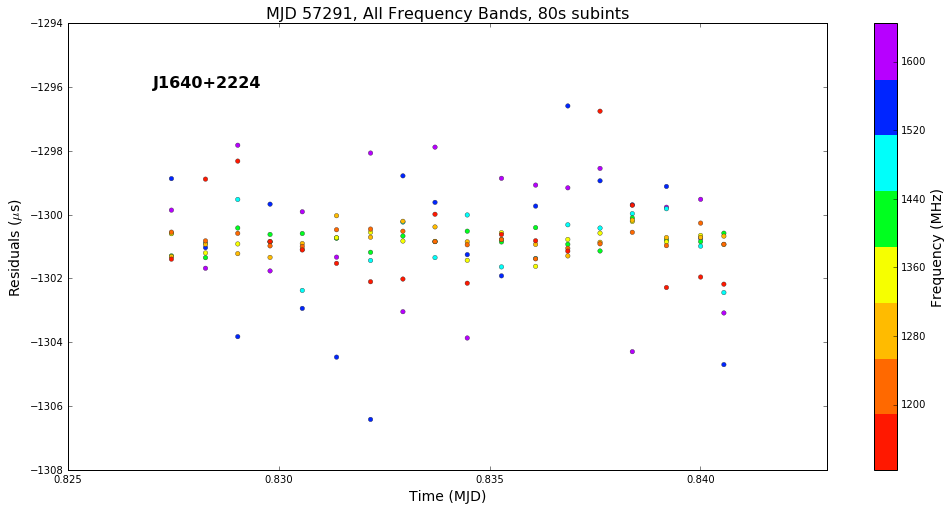

In [589]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1640+2224_resid_57291_80F8.tmp")

date = 57291
condition=(x.bary_TOA > 57291.826) & (x.bary_TOA < 57291.845)

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57291, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.825, 0.843)
ax.set_ylim(-1308, -1294)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('J1640+2224', xy=(0.827, -1296), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

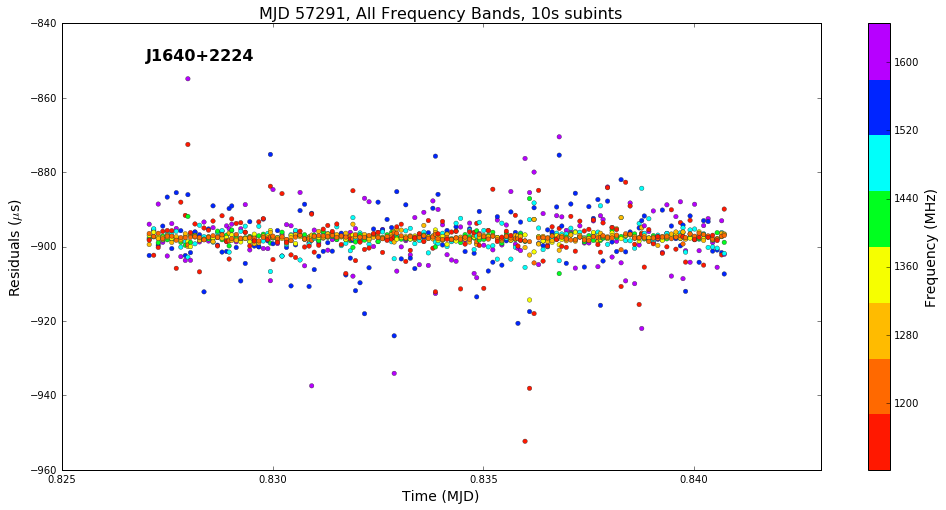

In [590]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1640+2224_resid_57291_NTF8.tmp")

date = 57291
condition=(x.bary_TOA > 57291.826) & (x.bary_TOA < 57291.845)

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57291, All Frequency Bands, 10s subints', fontsize='16')
ax.set_xlim(0.825, 0.843)
ax.set_ylim(-960, -840)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('J1640+2224', xy=(0.827, -850), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [581]:
print max(x.bary_freq[condition]) - min(x.bary_freq[condition])
print min(x.bary_freq[condition])

524.201135713
1121.45178201


In [584]:
525/9
1121+58

1179

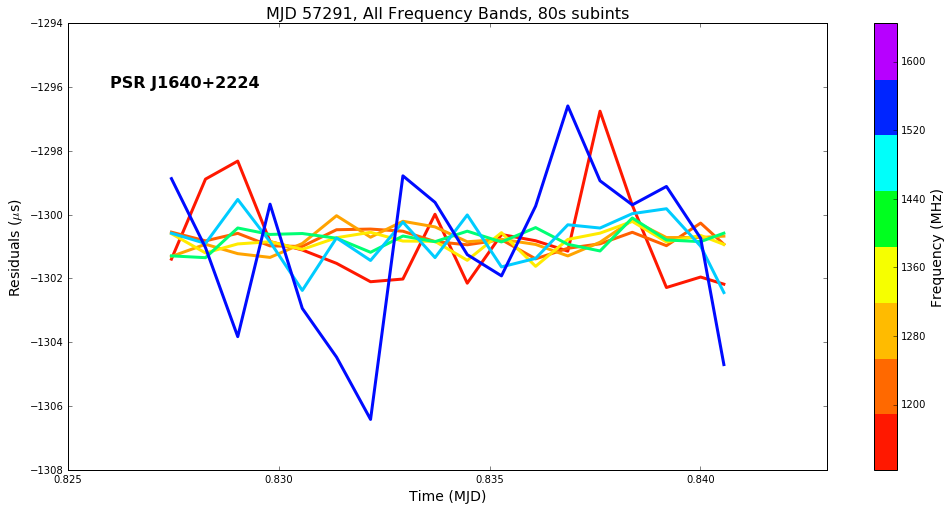

In [588]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1640+2224_resid_57291_80F8.tmp")


#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=9)

date = 57291
condition=(x.bary_TOA > 57291.826) & (x.bary_TOA < 57291.845)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1121
m = 1179
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57291, All Frequency Bands, 80s subints', fontsize='16')
    ax.set_xlim(0.825, 0.843)
    ax.set_ylim(-1308, -1294)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+58
    m=m+58
ax.annotate('PSR J1640+2224', xy=(0.826, -1296), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

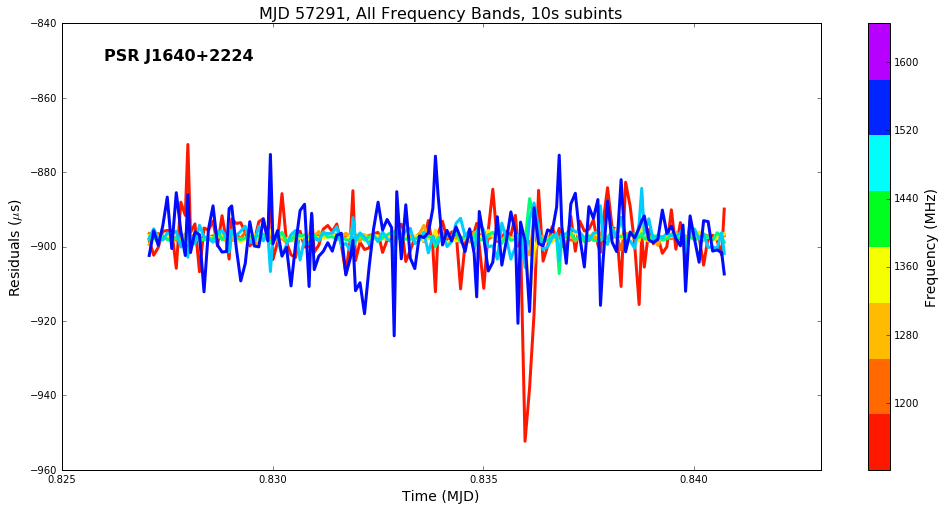

In [592]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1640+2224_resid_57291_NTF8.tmp")


#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=9)

date = 57291
condition=(x.bary_TOA > 57291.826) & (x.bary_TOA < 57291.845)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1121
m = 1179
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57291, All Frequency Bands, 10s subints', fontsize='16')
    ax.set_xlim(0.825, 0.843)
    ax.set_ylim(-960, -840)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+58
    m=m+58
ax.annotate('PSR J1640+2224', xy=(0.826, -850), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

In [636]:
## =============================
## Running on the highest SNR day for J0030+0451
## =============================

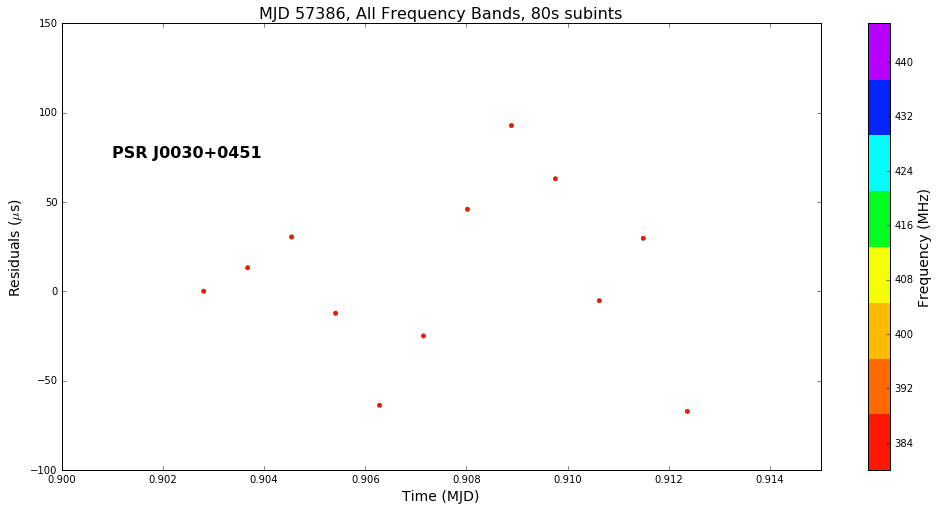

In [462]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J0030+0451_resid_57386_80F8.tmp")

date = 57386
condition=(x.bary_TOA > 57386.9) & (x.bary_TOA < 57386.915)

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57386, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.9, 0.915)
ax.set_ylim(-100, 150)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J0030+0451', xy=(0.901, 75), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

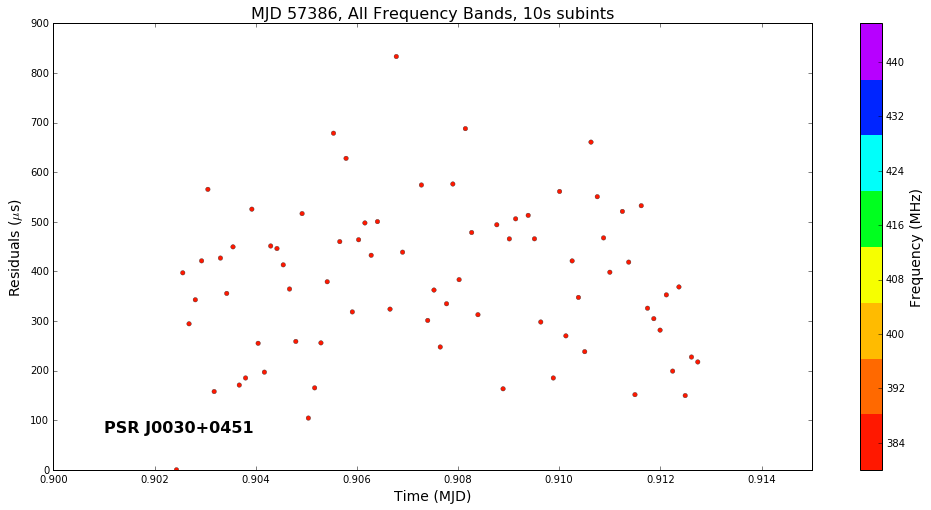

In [463]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J0030+0451_resid_57386_NTF8.tmp")

date = 57386
condition=(x.bary_TOA > 57386.9) & (x.bary_TOA < 57386.915)

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57386, All Frequency Bands, 10s subints', fontsize='16')
ax.set_xlim(0.9, 0.915)
ax.set_ylim(0, 900)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J0030+0451', xy=(0.901, 75), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [637]:
## =============================
## Running on the highest SNR day for J1944+0907
## =============================

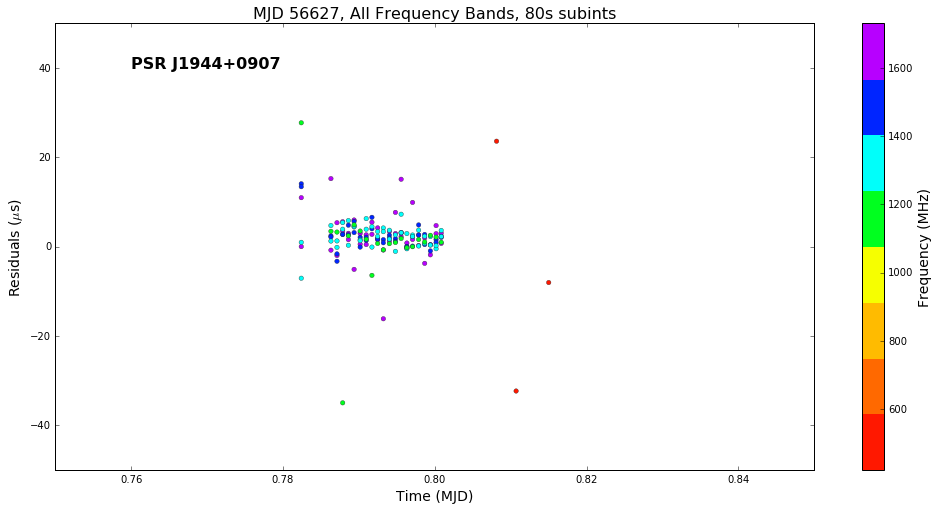

In [469]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1944+0907_resid_56627_80F8.tmp")

date = 56627

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56627, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.75, 0.85)
ax.set_ylim(-50, 50)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J1944+0907', xy=(0.76, 40), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

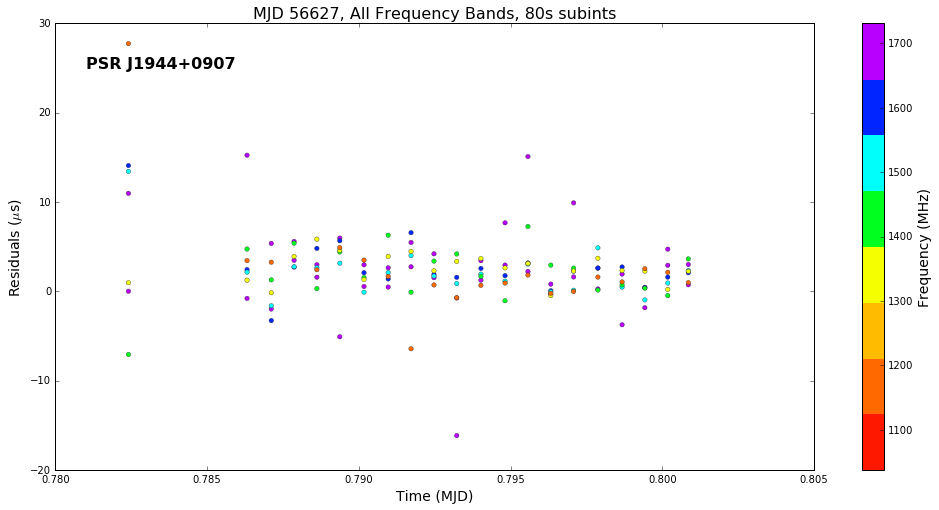

In [482]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1944+0907_resid_56627_80F8.tmp")

date = 56627
condition=(x.bary_TOA > 56627.77) & (x.bary_TOA < 56627.805)

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56627, L-Band, 80s subints', fontsize='16')
ax.set_xlim(0.78, 0.805)
ax.set_ylim(-20, 30)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J1944+0907', xy=(0.781, 25), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

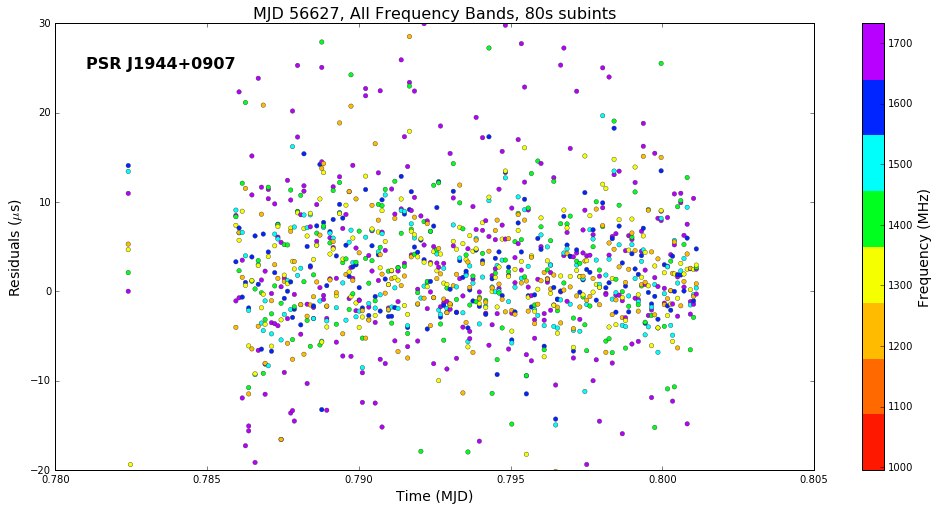

In [480]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1944+0907_resid_56627_NTF8.tmp")

date = 56627
condition=(x.bary_TOA > 56627.77) & (x.bary_TOA < 56627.805)

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56627, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.78, 0.805)
ax.set_ylim(-20, 30)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J1944+0907', xy=(0.781, 25), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [483]:
print max(x.bary_freq[condition]) - min(x.bary_freq[condition])
print min(x.bary_freq[condition])

693.310444955
1037.73017954


In [485]:
694/8
1037+86

1123

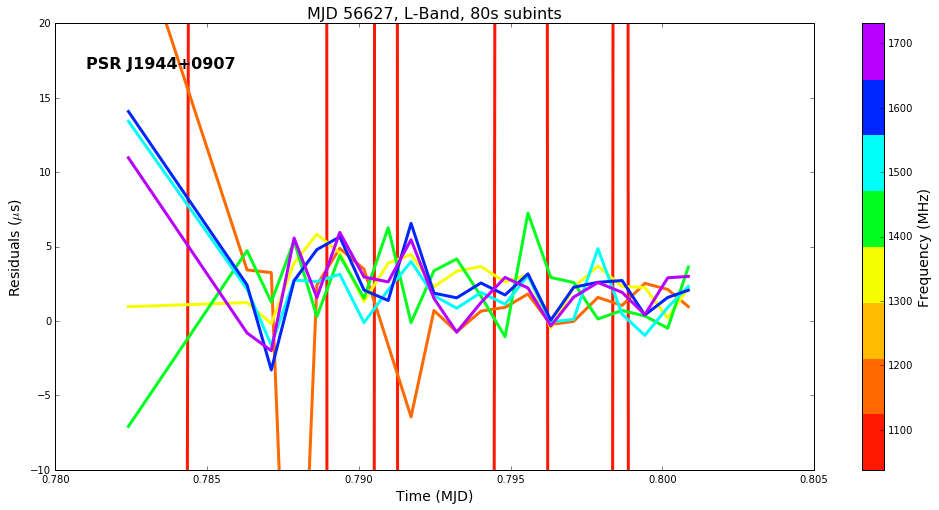

In [491]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1944+0907_resid_56627_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 8)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date = 56627
condition=(x.bary_TOA > 56627.77) & (x.bary_TOA < 56627.805)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1037
m = 1123
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,8):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56627, L-Band, 80s subints', fontsize='16')
    ax.set_xlim(0.78, 0.805)
    ax.set_ylim(-10, 20) #the reds are out at -1500 and 1500
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+86
    m=m+86
ax.annotate('PSR J1944+0907', xy=(0.781, 17), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

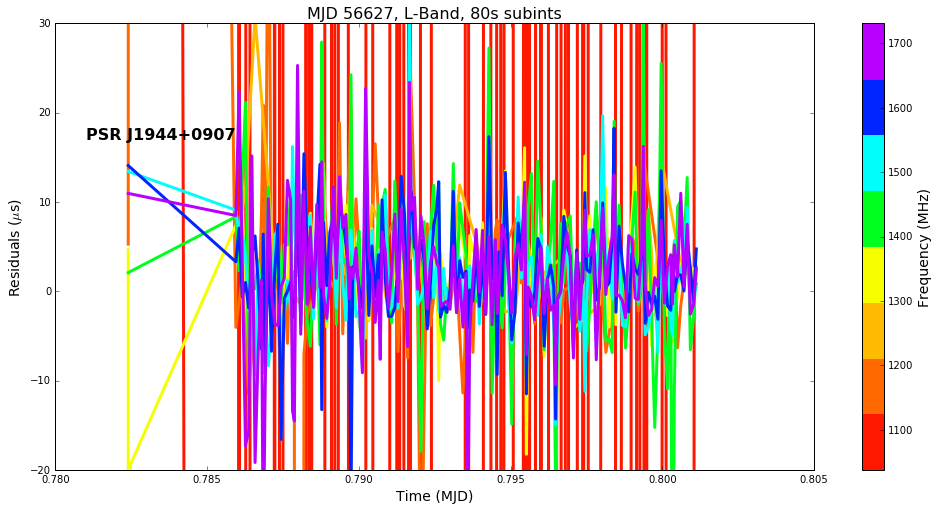

In [493]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1944+0907_resid_56627_NTF8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 8)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=8)

date = 56627
condition=(x.bary_TOA > 56627.77) & (x.bary_TOA < 56627.805)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1037
m = 1123
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,8):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56627, L-Band, 80s subints', fontsize='16')
    ax.set_xlim(0.78, 0.805)
    ax.set_ylim(-20, 30) #the reds are out at -1500 and 1500
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+86
    m=m+86
ax.annotate('PSR J1944+0907', xy=(0.781, 17), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show() 

In [ ]:
## =============================
## Running on the highest SNR day for J2229
## =============================

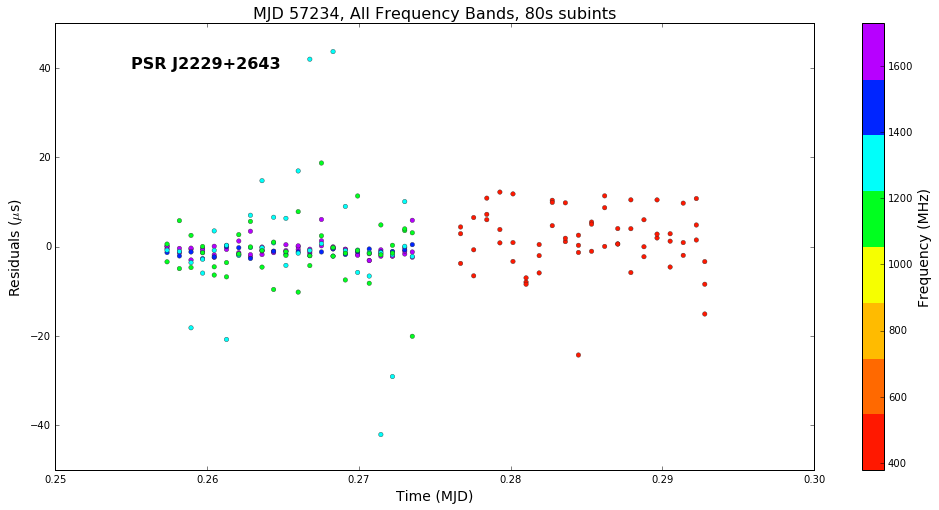

In [498]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2229+2643_resid_57234_80F8.tmp")

date = 57234

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57234, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.25, 0.3)
ax.set_ylim(-50, 50)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J2229+2643', xy=(0.255, 40), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

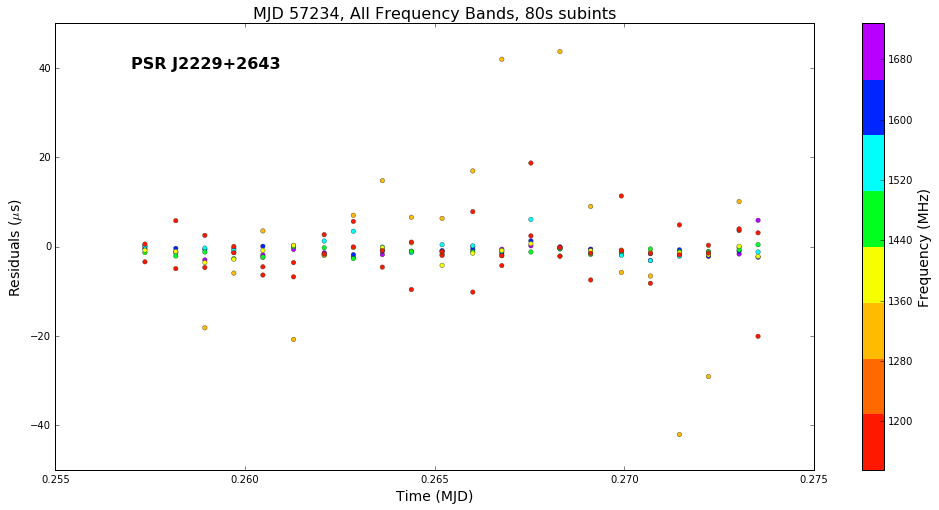

In [500]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2229+2643_resid_57234_80F8.tmp")

date = 57234
condition=(x.bary_TOA > 57234.255) & (x.bary_TOA < 57234.275)


#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57234, L-band, 80s subints', fontsize='16')
ax.set_xlim(0.255, 0.275)
ax.set_ylim(-50, 50)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J2229+2643', xy=(0.257, 40), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

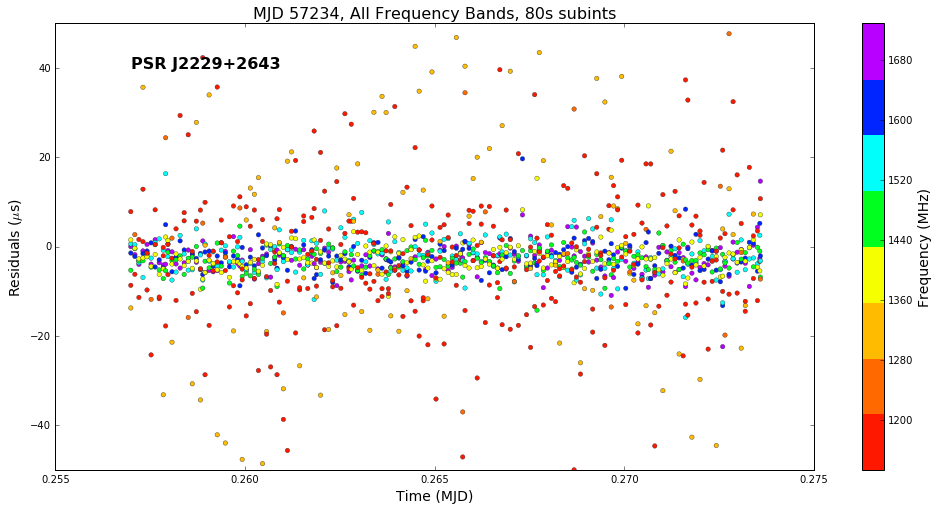

In [502]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2229+2643_resid_57234_NTF8.tmp")

date = 57234
condition=(x.bary_TOA > 57234.255) & (x.bary_TOA < 57234.275)


#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57234, L-band, 80s subints', fontsize='16')
ax.set_xlim(0.255, 0.275)
ax.set_ylim(-50, 50)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J2229+2643', xy=(0.257, 40), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [503]:
print max(x.bary_freq[condition]) - min(x.bary_freq[condition])
print min(x.bary_freq[condition])

595.397849357
1133.72400664


In [510]:
596/9
1133+66

1199

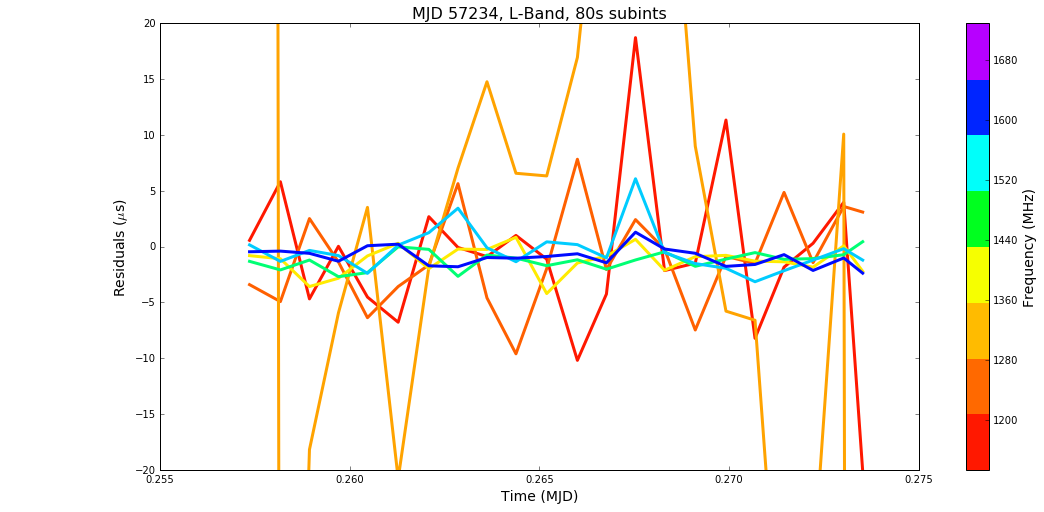

In [512]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2229+2643_resid_57234_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=9)

date = 57234
condition=(x.bary_TOA > 57234.255) & (x.bary_TOA < 57234.275)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1133
m = 1199
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57234, L-Band, 80s subints', fontsize='16')
    ax.set_xlim(0.255, 0.275)
    ax.set_ylim(-20, 20)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+66
    m=m+66
ax.annotate('PSR J2229+2643', xy=(0.257, 40), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

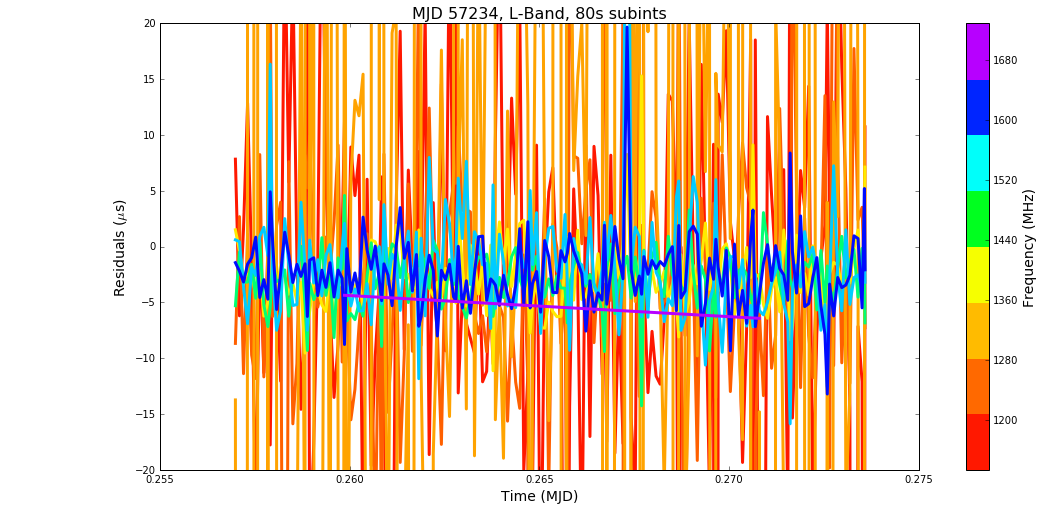

In [514]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2229+2643_resid_57234_NTF8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=9)

date = 57234
condition=(x.bary_TOA > 57234.255) & (x.bary_TOA < 57234.275)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1133
m = 1199
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57234, L-Band, 80s subints', fontsize='16')
    ax.set_xlim(0.255, 0.275)
    ax.set_ylim(-20, 20)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+66
    m=m+66
ax.annotate('PSR J2229+2643', xy=(0.257, 40), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

In [ ]:
## =============================
## Running on the highest SNR day for J0023+0923
## =============================

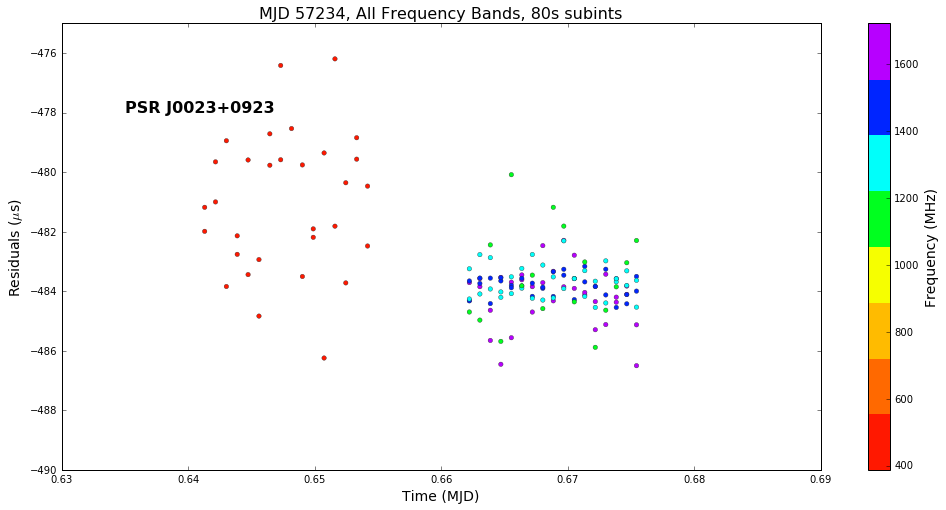

In [524]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J0023+0923_resid_56023_80F8.tmp")

date = 56023

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57234, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.63, 0.69)
ax.set_ylim(-490, -475)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J0023+0923', xy=(0.635, -478), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

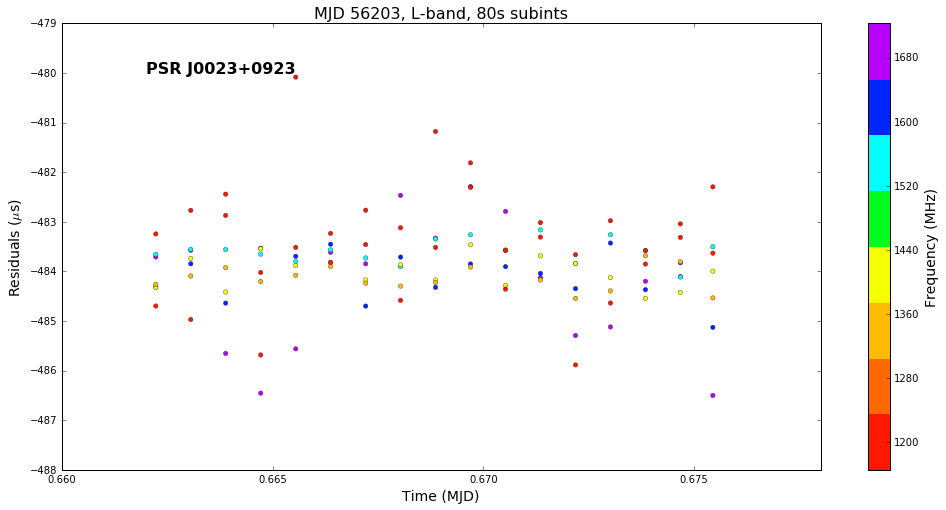

In [555]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J0023+0923_resid_56023_80F8.tmp")

date = 56023
condition=(x.bary_TOA > 56023.66) & (x.bary_TOA < 56023.68)


#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56203, L-band, 80s subints', fontsize='16')
ax.set_xlim(0.66, 0.678)
ax.set_ylim(-488, -479)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J0023+0923', xy=(0.662, -480), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

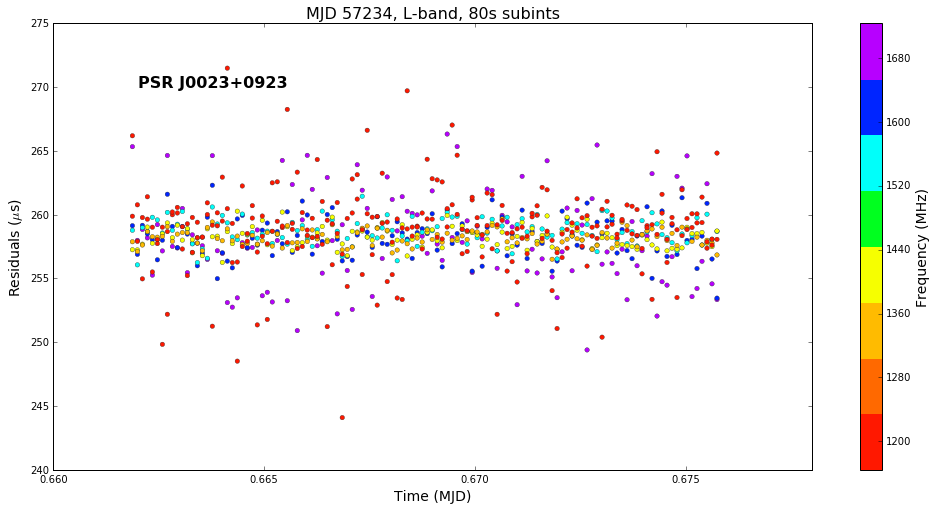

In [552]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J0023+0923_resid_56023_NTF8.tmp")

date = 56023
condition=(x.bary_TOA > 56023.66) & (x.bary_TOA < 56023.68)


#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57234, L-band, 80s subints', fontsize='16')
ax.set_xlim(0.66, 0.678)
ax.set_ylim(240, 275)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('PSR J0023+0923', xy=(0.662, 270), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [546]:
print max(x.bary_freq[condition]) - min(x.bary_freq[condition])
print min(x.bary_freq[condition])

558.61132587
1164.44300354


In [548]:
559/9
1164+62

1226

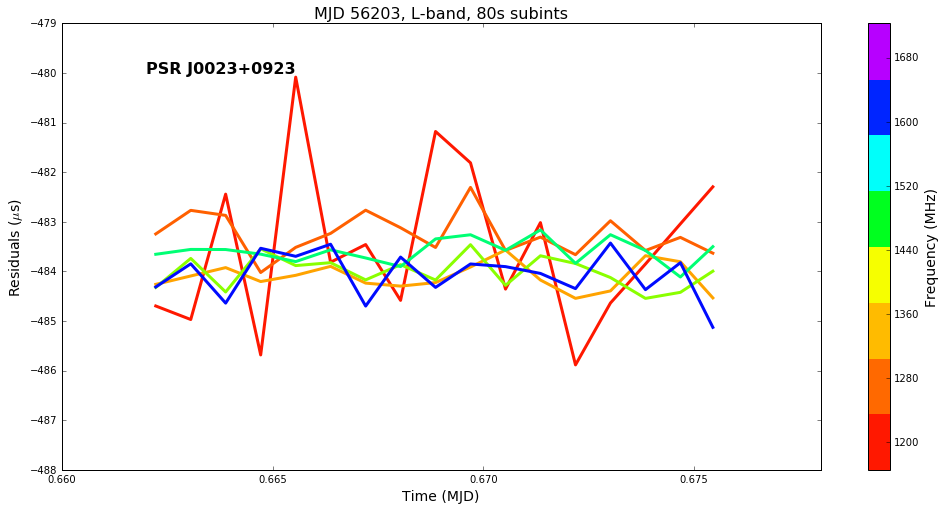

In [556]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J0023+0923_resid_56023_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=9)

date = 56023
condition=(x.bary_TOA > 56023.66) & (x.bary_TOA < 56023.68)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1164
m = 1226
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56203, L-band, 80s subints', fontsize='16')
    ax.set_xlim(0.66, 0.678)
    ax.set_ylim(-488, -479)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+62
    m=m+62
ax.annotate('PSR J0023+0923', xy=(0.662, -480), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

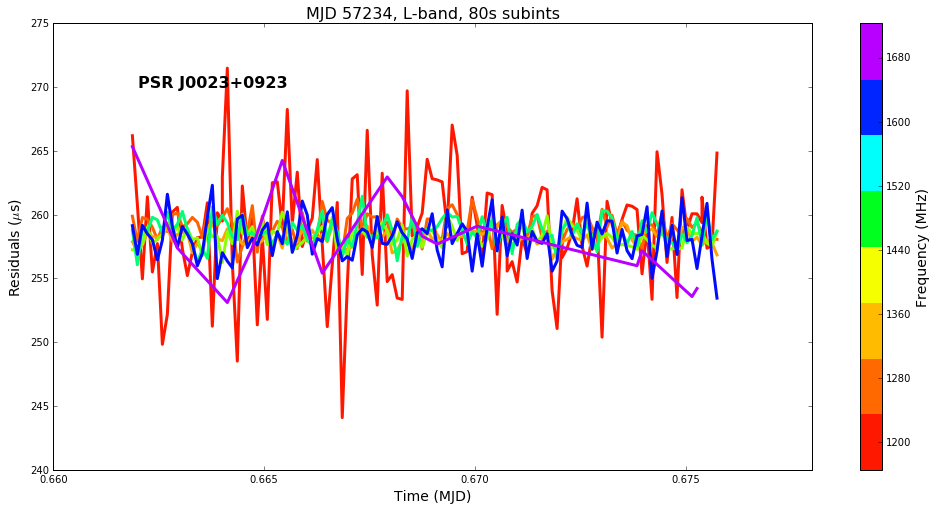

In [558]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J0023+0923_resid_56023_NTF8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=9)

date = 56023
condition=(x.bary_TOA > 56023.66) & (x.bary_TOA < 56023.68)

TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1164
m = 1226
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57234, L-band, 80s subints', fontsize='16')
    ax.set_xlim(0.66, 0.678)
    ax.set_ylim(240, 275)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+62
    m=m+62
ax.annotate('PSR J0023+0923', xy=(0.662, 270), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

In [593]:
## =============================
## Running on the highest SNR day for J1738+0747
## =============================

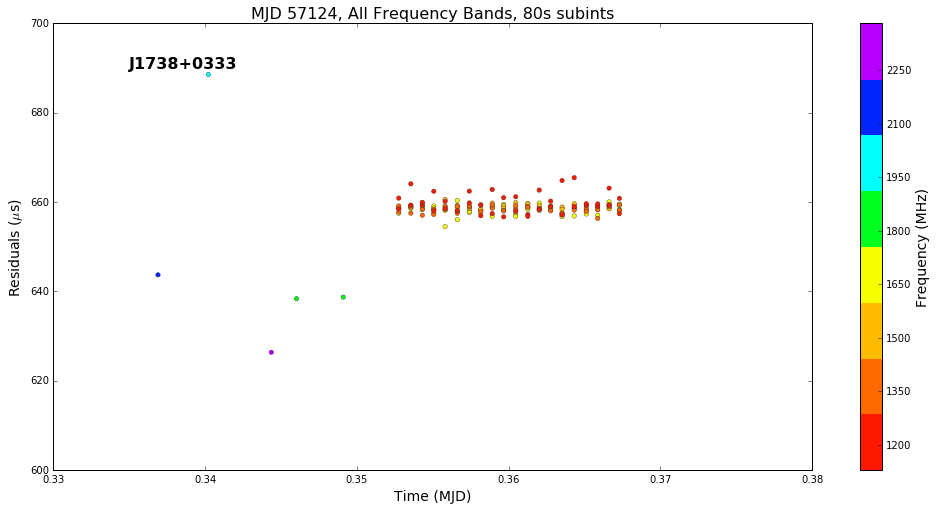

In [600]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1738+0333_resid_57124_80F8.tmp")

date = 57124

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57124, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.33, 0.38)
ax.set_ylim(600, 700)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('J1738+0333', xy=(0.335, 690), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

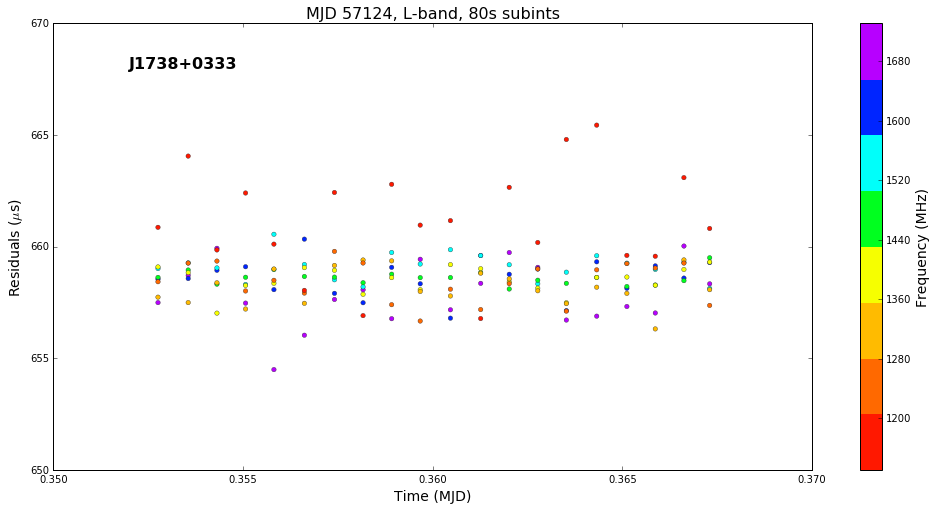

In [604]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1738+0333_resid_57124_80F8.tmp")

date = 57124
condition=(x.bary_TOA > 57124.352) & (x.bary_TOA < 57124.37)


#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 57124, L-band, 80s subints', fontsize='16')
ax.set_xlim(0.35, 0.37)
ax.set_ylim(650, 670)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('J1738+0333', xy=(0.352, 668), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

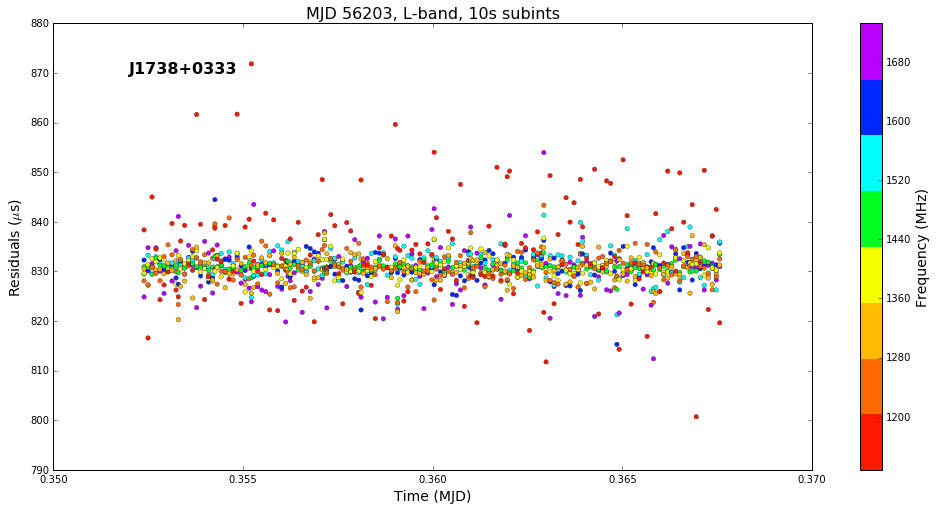

In [613]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1738+0333_resid_57124_NTF8.tmp")

date = 57124
condition=(x.bary_TOA > 57124.352) & (x.bary_TOA < 57124.37)


#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56203, L-band, 10s subints', fontsize='16')
ax.set_xlim(0.35, 0.37)
ax.set_ylim(790, 880)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('J1738+0333', xy=(0.352, 870), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [610]:
print max(x.bary_freq[condition]) - min(x.bary_freq[condition])
print min(x.bary_freq[condition])
interval = (max(x.bary_freq[condition]) - min(x.bary_freq[condition]))/9
print interval
print min(x.bary_freq[condition]) + interval

603.820264996
1128.18199133


In [612]:
interval = (max(x.bary_freq[condition]) - min(x.bary_freq[condition]))/9
print interval
print min(x.bary_freq[condition]) + interval

67.0911405551
1195.27313189


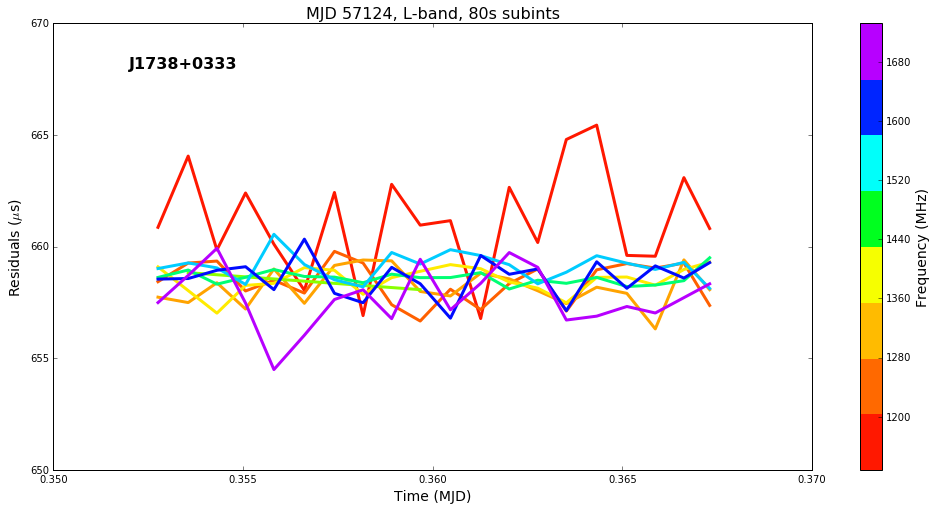

In [614]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1738+0333_resid_57124_80F8.tmp")

date = 57124
condition=(x.bary_TOA > 57124.352) & (x.bary_TOA < 57124.37)

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=9)


TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1128
m = 1195
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 57124, L-band, 80s subints', fontsize='16')
    ax.set_xlim(0.35, 0.37)
    ax.set_ylim(650, 670)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+67
    m=m+67
ax.annotate('J1738+0333', xy=(0.352, 668), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

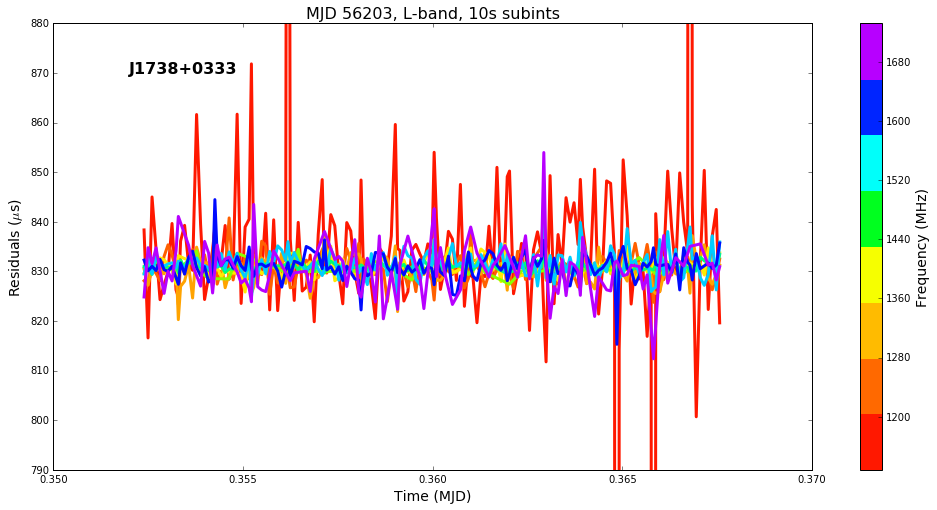

In [616]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J1738+0333_resid_57124_NTF8.tmp")

date = 57124
condition=(x.bary_TOA > 57124.352) & (x.bary_TOA < 57124.37)

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=9)


TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1128
m = 1195
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56203, L-band, 10s subints', fontsize='16')
    ax.set_xlim(0.35, 0.37)
    ax.set_ylim(790, 880)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+67
    m=m+67
ax.annotate('J1738+0333', xy=(0.352, 870), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

In [617]:
## =============================
## Running on the highest SNR day for J2214+3000
## =============================

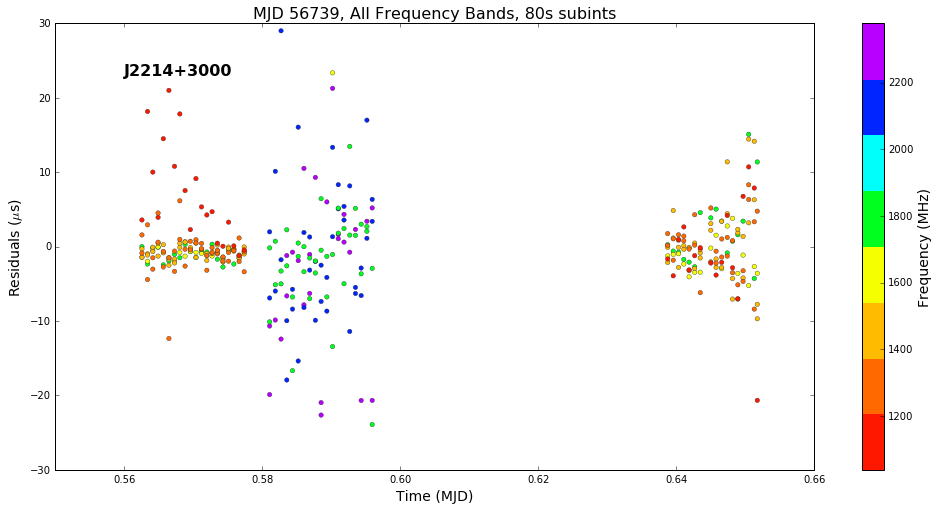

In [624]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2214+3000_resid_56739_80F8.tmp")

date = 56739

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56739, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.55, 0.66)
ax.set_ylim(-30, 30)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('J2214+3000', xy=(0.56, 23), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

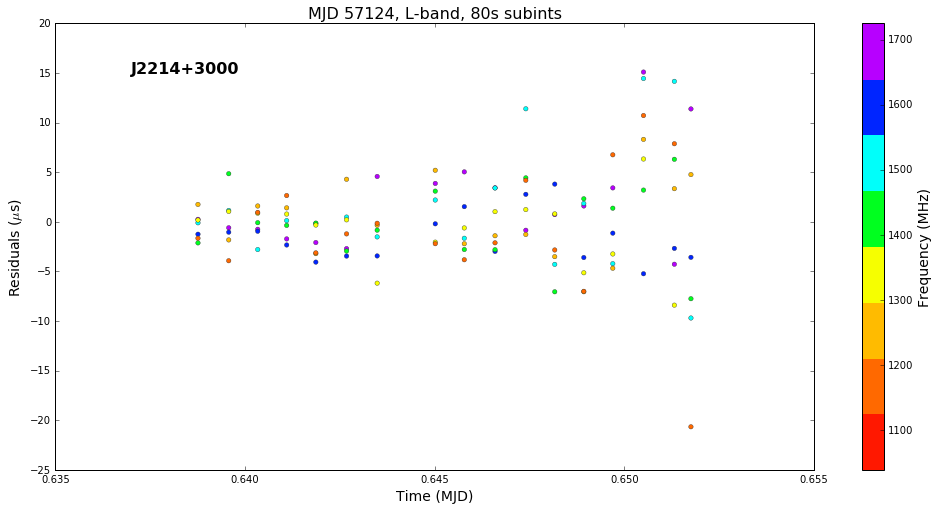

In [626]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2214+3000_resid_56739_80F8.tmp")

date = 56739
condition=(x.bary_TOA > 56739.63) & (x.bary_TOA < 56739.66)


#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56739, L-band, 80s subints', fontsize='16')
ax.set_xlim(0.635, 0.655)
ax.set_ylim(-25, 20)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('J2214+3000', xy=(0.637, 15), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

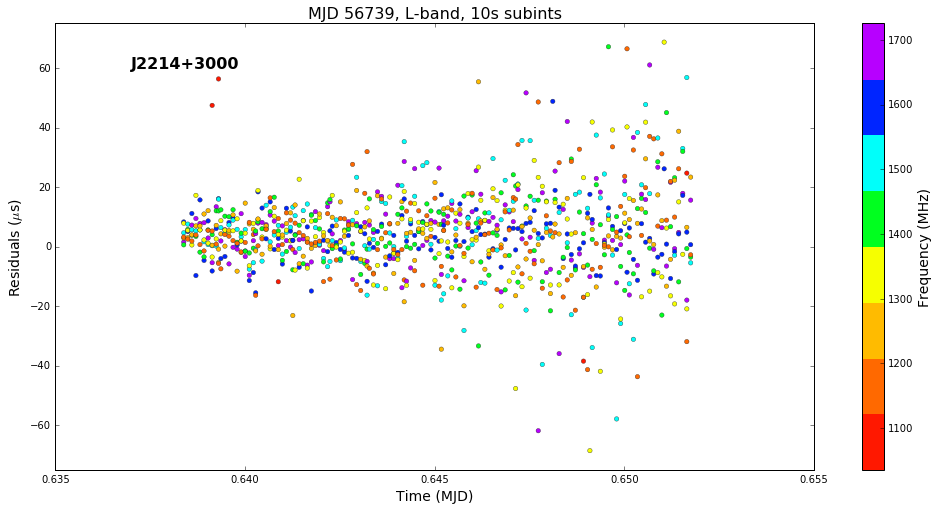

In [630]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2214+3000_resid_56739_NTF8.tmp")

date = 56739
condition=(x.bary_TOA > 56739.63) & (x.bary_TOA < 56739.66)


#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56739, L-band, 10s subints', fontsize='16')
ax.set_xlim(0.635, 0.655)
ax.set_ylim(-75, 75)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('J2214+3000', xy=(0.637, 60), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

In [631]:
print max(x.bary_freq[condition]) - min(x.bary_freq[condition])
print min(x.bary_freq[condition])
interval = (max(x.bary_freq[condition]) - min(x.bary_freq[condition]))/9
print interval
print min(x.bary_freq[condition]) + interval

690.12099436
1035.53704618
76.6801104845
1112.21715667


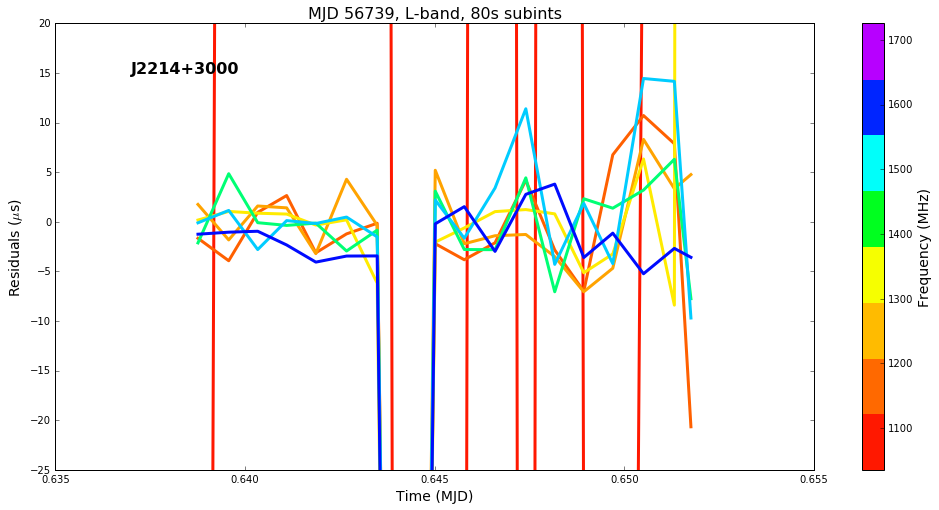

In [633]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2214+3000_resid_56739_80F8.tmp")

date = 56739
condition=(x.bary_TOA > 56739.63) & (x.bary_TOA < 56739.66)

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=9)


TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1035
m = 1112
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56739, L-band, 80s subints', fontsize='16')
    ax.set_xlim(0.635, 0.655)
    ax.set_ylim(-25, 20)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+76
    m=m+76
ax.annotate('J2214+3000', xy=(0.637, 15), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

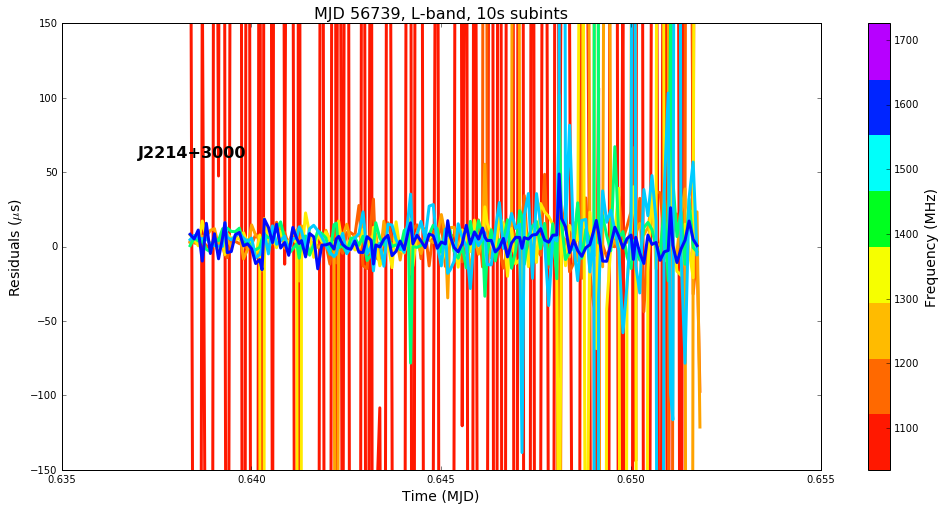

In [635]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2214+3000_resid_56739_NTF8.tmp")

date = 56739
condition=(x.bary_TOA > 56739.63) & (x.bary_TOA < 56739.66)

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 9)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=9)


TOA=x.bary_TOA[condition] - date
Resid=micro*(x.prefit_sec[condition])
Freq=x.bary_freq[condition]

n = 1035
m = 1112
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,9):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56739, L-band, 10s subints', fontsize='16')
    ax.set_xlim(0.635, 0.655)
    ax.set_ylim(-150, 150)
    ax.set_xlabel('Time (MJD)', fontsize='14')
    ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
    n=n+76
    m=m+76
ax.annotate('J2214+3000', xy=(0.637, 60), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')
plt.show()

In [638]:
## =============================
## Running on the highest SNR day for J2234+0611
## =============================

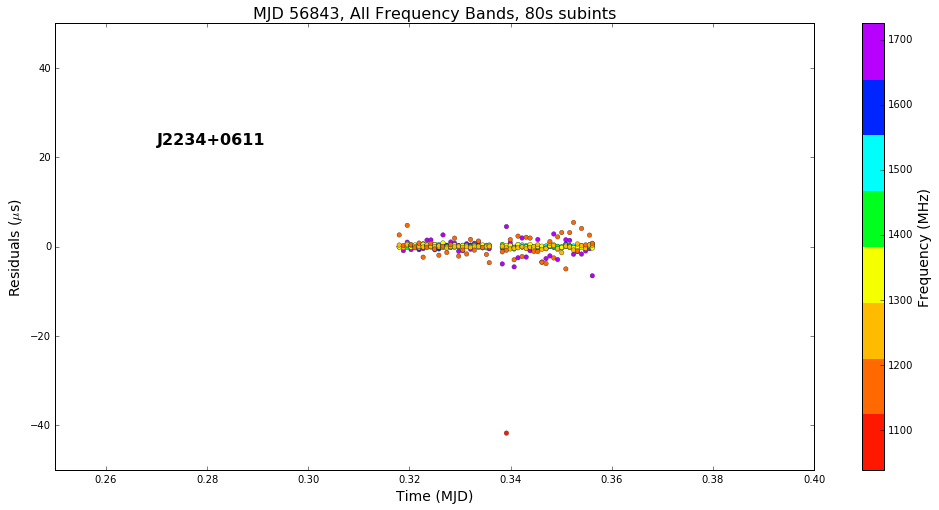

In [640]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2234+0611_resid_56843_80F8.tmp")

date = 56843

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA - date, micro*(x.prefit_sec), c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56843, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(0.25, 0.4)
ax.set_ylim(-50, 50)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('J2234+0611', xy=(0.27, 23), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

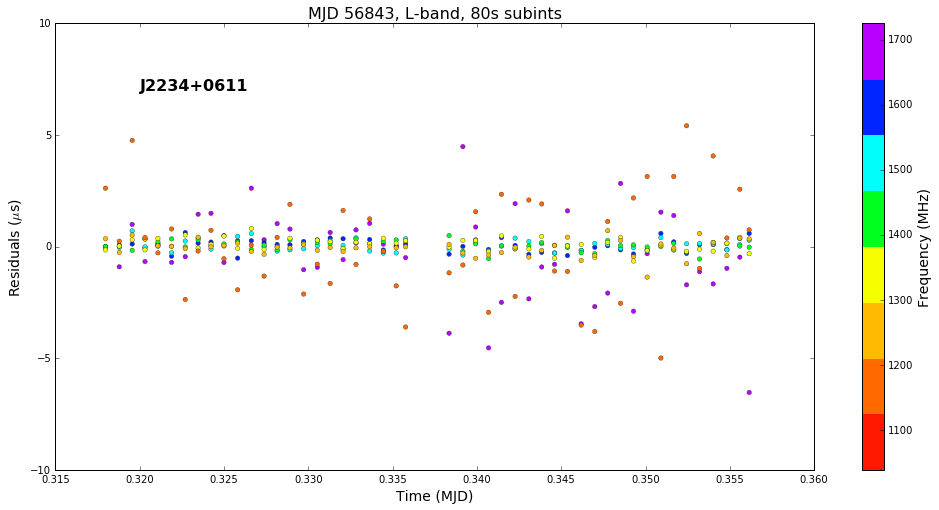

In [644]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2234+0611_resid_56843_80F8.tmp")

date = 56843
condition=(x.bary_TOA > 56843.31) & (x.bary_TOA < 56843.37)


#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56843, L-band, 80s subints', fontsize='16')
ax.set_xlim(0.315, 0.36)
ax.set_ylim(-10, 10)
ax.set_xlabel('Time (MJD)', fontsize='14')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
ax.annotate('J2234+0611', xy=(0.32, 7), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='14')

plt.show()

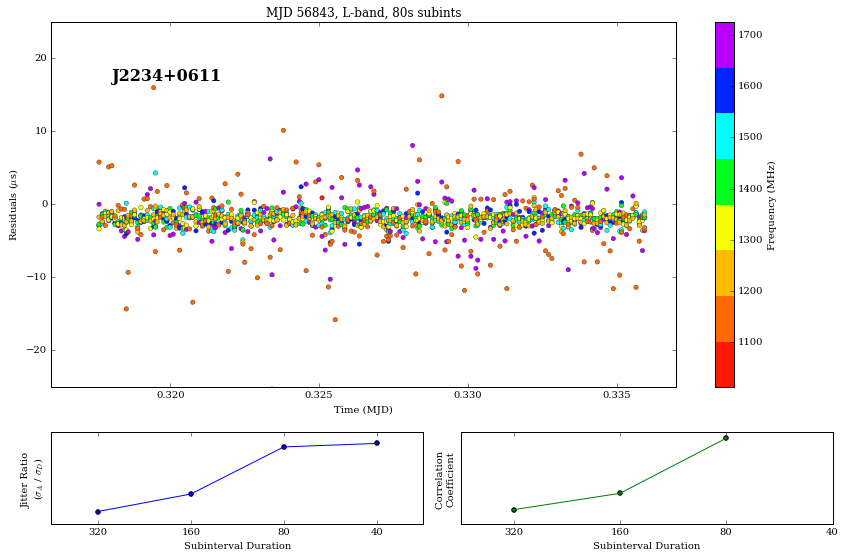

In [854]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/J2234+0611_resid_56843_NTF8.tmp")

date = 56843
condition=(x.bary_TOA > 56843.31) & (x.bary_TOA < 56843.37)


#This plot uses all frequency bands
fig= plt.figure(figsize=(14,9))
ax = plt.subplot2grid((4,2), (0,0), colspan=2, rowspan=3)
divider = make_axes_locatable(ax)
cax = ax.scatter(x.bary_TOA[condition] - date, 
                 micro*(x.prefit_sec[condition]), 
                 c=x.bary_freq[condition], s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56843, L-band, 80s subints', fontsize='12')
ax.set_xlim(0.316, 0.337)
ax.set_ylim(-25, 25)
ax.set_xlabel('Time (MJD)', fontsize='10')
ax.set_ylabel('Residuals (${\mu}$s)', fontsize='10')
ax.annotate('J2234+0611', xy=(0.318, 17), fontweight='bold', fontsize='16')
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Frequency (MHz)', fontsize='10')

jitter_ratios = OrderedDict([('320', 3.210173366993391), ('160', 4.934992206305081), ('80', 9.579566420925236), ('40', 9.922240545819538)])
corr_coefs = OrderedDict([('320', 0.89548146274825058), ('160', 0.91338409567280654), ('80', 0.97371200984760009)])

ax1=plt.subplot2grid((4, 2), (3,0))
ax1.plot(range(len(jitter_ratios)), jitter_ratios.values(), c='blue')
ax1.scatter(range(len(jitter_ratios)), jitter_ratios.values(), c='blue')
ax1.set_ylabel('Jitter Ratio \n($\sigma_A$ / $\sigma_D$)', fontsize='10')
ax1.set_xlabel('Subinterval Duration', fontsize='10')
ax1.get_yaxis().set_ticks([])

ax1.set_xticks(range(len(jitter_ratios))) 
ax1.set_xticklabels(jitter_ratios.keys())

ax2 = plt.subplot2grid((4,2),(3,1))
ax2.plot(range(len(corr_coefs)), corr_coefs.values(), c='green')
ax2.scatter(range(len(corr_coefs)), corr_coefs.values(), c='green')
ax2.set_ylabel('Correlation \nCoefficient', fontsize=10)
ax2.set_xlabel('Subinterval Duration', fontsize='10')
ax2.get_yaxis().set_ticks([])
# ax2.locator_params(nbins=4)

ax2.set_xticks(range(len(jitter_ratios))) 
ax2.set_xticklabels(jitter_ratios.keys())

fig.subplots_adjust(hspace=0.5, wspace=0.1)

In [705]:
from images2gif import writeGif
from PIL import Image
import os

file_names = sorted((fn for fn in os.listdir('.') if fn.endswith('.jpg')), 
                    reverse=True)

images = [Image.open(fn) for fn in file_names]

# for im in images:
#     im.thumbnail(Image.ANTIALIAS)

print writeGif.__doc__
# writeGif(filename, images, duration=0.1, loops=0, dither=1)
#    Write an animated gif from the specified images.
#    images should be a list of numpy arrays of PIL images.
#    Numpy images of type float should have pixels between 0 and 1.
#    Numpy images of other types are expected to have values between 0 and 255.

filename = "J1713+0747_56380.gif"
writeGif(filename, images, duration=0.3, loops=100)


 writeGif(filename, images, duration=0.1, loops=0, dither=1)
    Write an animated gif from the specified images. 
    images should be a list of numpy arrays of PIL images.
    Numpy images of type float should have pixels between 0 and 1.
    Numpy images of other types are expected to have values between 0 and 255.
    
4 frames written


In [738]:


file_names = sorted((fn for fn in os.listdir('.') if fn.endswith('56201.jpg')), 
                    reverse=True)

images = [Image.open(fn) for fn in file_names]

# for im in images:
#     im.thumbnail(Image.ANTIALIAS)

print writeGif.__doc__
# writeGif(filename, images, duration=0.1, loops=0, dither=1)
#    Write an animated gif from the specified images.
#    images should be a list of numpy arrays of PIL images.
#    Numpy images of type float should have pixels between 0 and 1.
#    Numpy images of other types are expected to have values between 0 and 255.

filename = "J1713+0747_56201.gif"
writeGif(filename, images, duration=0.4, loops=np.inf)


 writeGif(filename, images, duration=0.1, loops=0, dither=1)
    Write an animated gif from the specified images. 
    images should be a list of numpy arrays of PIL images.
    Numpy images of type float should have pixels between 0 and 1.
    Numpy images of other types are expected to have values between 0 and 255.
    
4 frames written


In [909]:
#Trying to create something that makes gifs of the plots as the jitter ratio develops

def jitter_gif(psrname, MJDint, condition_lower, condition_upper, xlim, ylim):
    jitter_ratios = OrderedDict()
    corr_coefs = OrderedDict()
    file_names = []
    for elem in ['320','160','80', '40', '20', 'NT']:
        #Define sigma_all (or std_all) as entire observation period
        x=r.read_residuals(filename="/nimrod1/eschwab/residuals/%s_resid_%s_%sF8.tmp" %(psrname, MJDint, elem))

        condition = (x.bary_TOA > condition_lower) & (x.bary_TOA < condition_upper)
        Resid_all = x.prefit_sec[condition]
        Errors_all = x.uncertainty[condition]
        std_all = weighted_stddev(Resid_all, Errors_all)

        ##============

        #Define sigma_dump (or std_all) as individual dumps within observation period

        #This isolates the numbers for the different dump times
        rounded = np.round(np.array([x.bary_TOA[condition] - 0.00005]), 4)
        dumptimes=[]
        for i in rounded.tolist()[0]: 
            if i not in dumptimes:
                dumptimes.append(i)

        #This calculates a list of sigma_dump values and averages those
        str_dump_devs=[]
        for i in dumptimes:
            timeindex = (rounded == i)[0]
            Resid = Resid_all[timeindex]
            Errors = Errors_all[timeindex]
            single_std_dump = weighted_stddev(Resid, Errors)
            str_dump_devs.append(single_std_dump)

        #to convert str_dump_devs out of scientific notation
        dump_devs=[]
        for i in str_dump_devs:
            dump_devs.append('{0:.20f}'.format(i))

        #prints the magnitude of each sigma_dump in a list and finds average magnitude
        magarray=[]
        for i in dump_devs:
            magarray.append(magnitude(i))
        averagemag = round(np.mean(magarray))

        arg=averagemag+1.5
        makemask = np.ma.masked_where(np.array(magarray) > arg, np.array(magarray))

        std_dump=np.mean(str_dump_devs)
        masked_std_dump = np.mean(np.ma.masked_where(np.ma.getmask(makemask), str_dump_devs))

        #Setup jitter ratio
        ratio = std_all / std_dump
        masked_ratio = float(std_all / masked_std_dump)
        jitter_ratios[elem] = masked_ratio

        ##============

        #Print out the correlation coefficient also, to allow for easy reference

        #Creating the matrix of the data and transposing it to correct format
        data = []
        data_errors = []
        for i in dumptimes[1:]: #the first set of resids needs to be skipped in J1713, but not sure for all of them?
            timeindex = (rounded == i)[0]
            Resids = Resid_all[timeindex]
            Errors = Errors_all[timeindex]
            data.append(Resids)
            data_errors.append(Errors)

        data = map(list, zip(*data)) #transposing the matrix, supposedly unnecessary if rowvar=0 in corr but gives errors

        #Using the Weighted Correlation Coefficient from wikipedia
        #https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient#Weighted_correlation_coefficient
        # I added weights by creating a weighted value to multiply each data element by
        #The weighted values are normalized by dividing each value by the sum of all weights

        data_weights = 1. / (np.array(data_errors)**2)
        data_weights = map(list, zip(*(data_weights.tolist())))

        #data_weights is a matrix of all the weights

        norm_weights = []
        for i in data_weights:
            norm_weights.append([j/sum(i) for j in i])

        weighted_data = []
        for i,j in zip(data, norm_weights):
            weighted_data.append([a*b for a,b in zip(i,j)])

        #Correlating! 
        corr = np.corrcoef(data)
        weighted_corr = np.corrcoef(weighted_data)

        unique_corrs = []
        #Averaging the correlation
        for i in range(len(corr)):
            unique_corrs.append(corr[i][i+1:]) #because numpy array, double index necessay
        unique_corrs  = [val for sublist in unique_corrs for val in sublist]
        final_coefficient = np.average(unique_corrs)

        unique_weighted_corrs = []
        #Averaging the correlation
        for i in range(len(weighted_corr)):
            unique_weighted_corrs.append(weighted_corr[i][i+1:]) #because numpy array, double index necessay
        unique_weighted_corrs  = [val for sublist in unique_weighted_corrs for val in sublist]
        final_weighted_coefficient = np.average(unique_weighted_corrs)
        
        corr_coefs[elem] = final_coefficient
        
        ##========
        
        #Define the colormap

        interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
        colors=plt.cm.gist_rainbow(interval)
        cmap_lines=LinearSegmentedColormap.from_list('name', colors, 8)
        tick_locator_lines = ticker.MaxNLocator(nbins=8)
        
        #Setup the arrays

        date = int(MJDint)
        condition=(x.bary_TOA > condition_lower) & (x.bary_TOA < condition_upper)

        TOA=x.bary_TOA[condition] - date
        Resid=micro*(x.prefit_sec[condition])
        Freq=x.bary_freq[condition]
        
        n = min(x.bary_freq[condition])
        interval = (max(x.bary_freq[condition]) - min(x.bary_freq[condition]))/9
        m = min(x.bary_freq[condition]) + interval
        
        #plot the subplots
        
        fig,ax = plt.subplots(figsize=(17,12))
        
        ax = plt.subplot2grid((4,2), (0,0), colspan=2, rowspan=3)
        divider = make_axes_locatable(ax)

        for i in range (0,8):
            ax.plot(TOA[(Freq > n) & (Freq < m)], 
                          Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
            ax.set_title('MJD %s, L-band, %ss subintervals' %(MJDint, elem), fontsize='16')
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
            ax.set_xlabel('Time (MJD)', fontsize='14')
            ax.set_ylabel('Residuals (${\mu}$s)', fontsize='14')
            n=n+interval
            m=m+interval
        ax.annotate('PSR %s' %psrname, xy=(0.1, 0.9), xycoords='axes fraction', 
                    fontweight='bold', fontsize='16', horizontalalignment='left', verticalalignment='top')
        cb=fig.colorbar(cax)
        cb.locator = tick_locator_lines
        cb.update_ticks()
        cb.set_label('Frequency (MHz)', fontsize='14')
        plt.savefig('%s_%ss_%s.jpg' %(psrname, elem, MJDint))

        ax1=plt.subplot2grid((4, 2), (3,0))
        ax1.plot(range(len(jitter_ratios)), jitter_ratios.values(), c='blue')
        ax1.scatter(range(len(jitter_ratios)), jitter_ratios.values(), c='blue')
        ax1.set_ylabel('Jitter Ratio \n($\sigma_A$ / $\sigma_D$)', fontsize='12')
        ax1.set_xlabel('Subinterval Duration', fontsize='12')
        ax1.get_yaxis().set_ticks([])

        ax1.set_xticks(range(len(jitter_ratios))) 
        ax1.set_xticklabels(jitter_ratios.keys())

        ax2 = plt.subplot2grid((4,2),(3,1))
        ax2.plot(range(len(corr_coefs)), corr_coefs.values(), c='green')
        ax2.scatter(range(len(corr_coefs)), corr_coefs.values(), c='green')
        ax2.set_ylabel('Correlation \nCoefficient', fontsize='12')
        ax2.set_xlabel('Subinterval Duration', fontsize='12')
        ax2.get_yaxis().set_ticks([])

        ax2.set_xticks(range(len(jitter_ratios))) 
        ax2.set_xticklabels(jitter_ratios.keys())

        fig.subplots_adjust(hspace=0.5, wspace=0.1)

        plt.savefig('%s_%ss_%s.jpg' %(psrname, elem, MJDint))
        plt.show()
        file_names.append('%s_%ss_%s.jpg' %(psrname, elem, MJDint))
        
    #Adding the gif maker
    images = [Image.open(fn) for fn in file_names]


    print writeGif.__doc__
    # writeGif(filename, images, duration=0.1, loops=0, dither=1)
    #    Write an animated gif from the specified images.
    #    images should be a list of numpy arrays of PIL images.
    #    Numpy images of type float should have pixels between 0 and 1.
    #    Numpy images of other types are expected to have values between 0 and 255.

    filename = "%s_%s.gif" %(psrname, MJDint)
    writeGif(filename, images, duration=0.6, loops=np.inf)
    print "%s_%s.gif" %(psrname, MJDint)

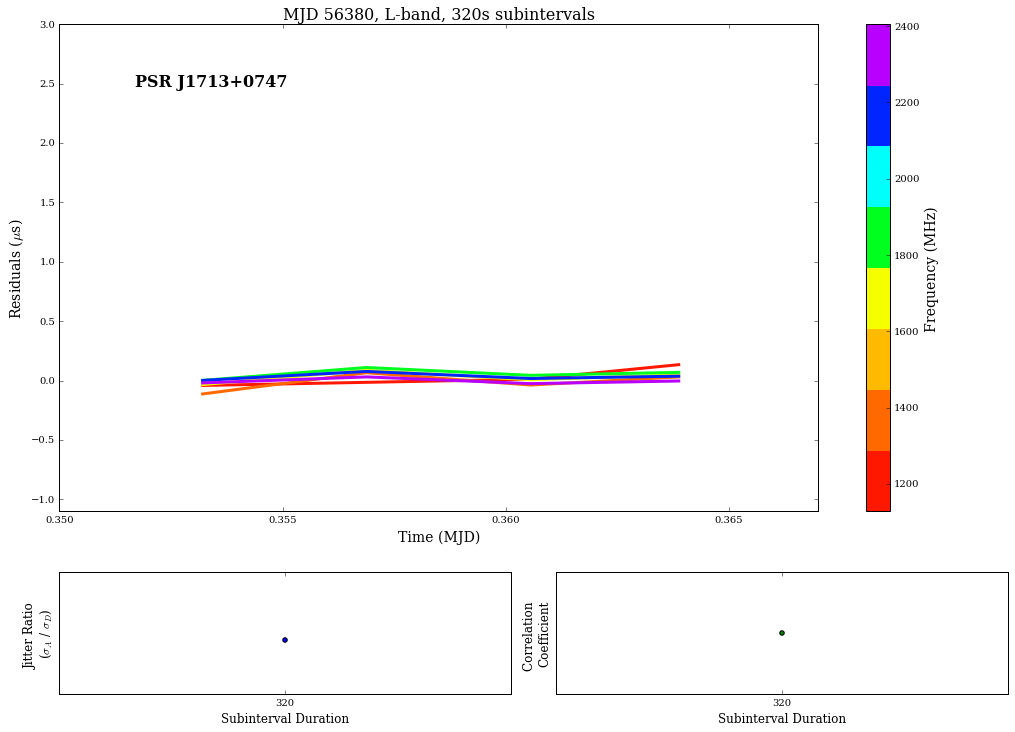

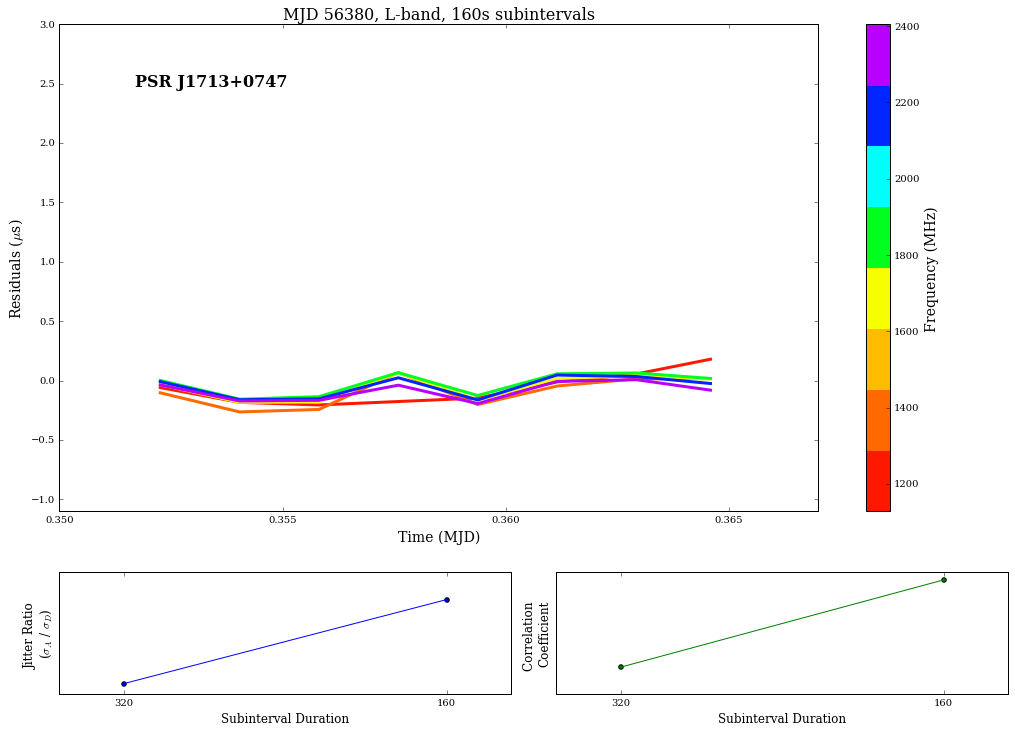

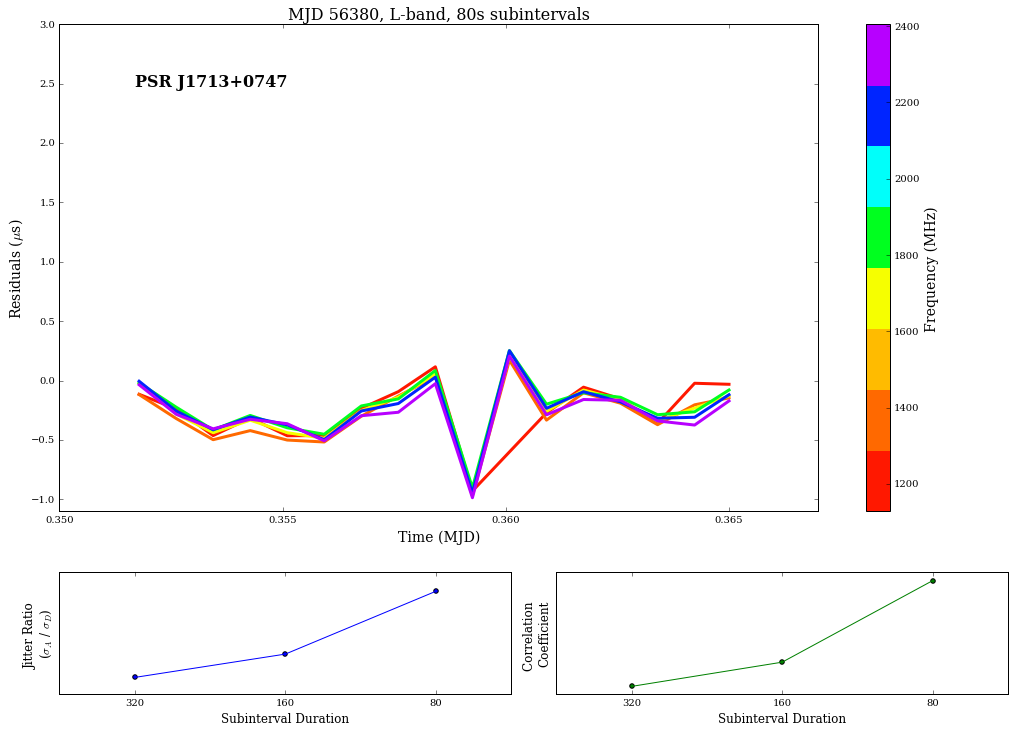

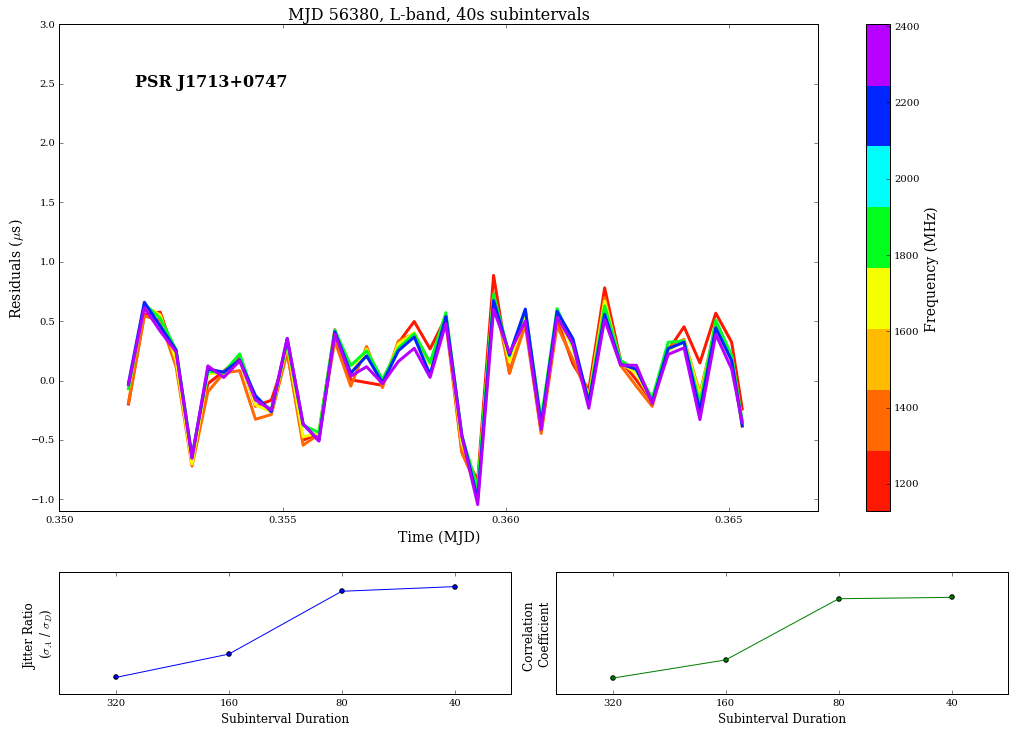

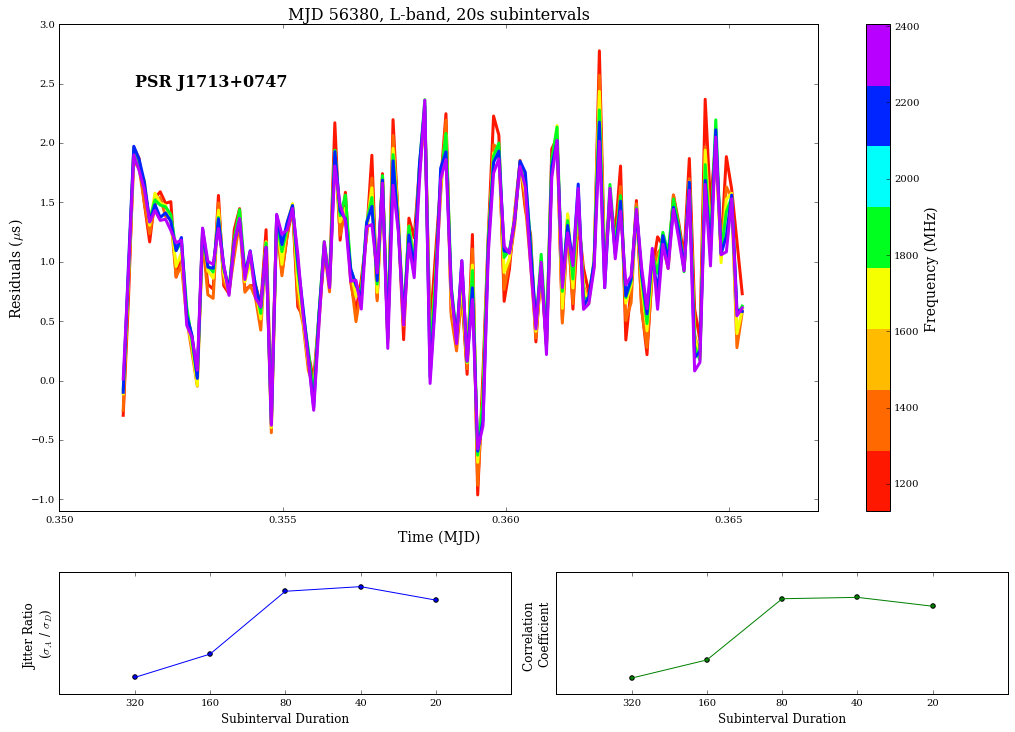

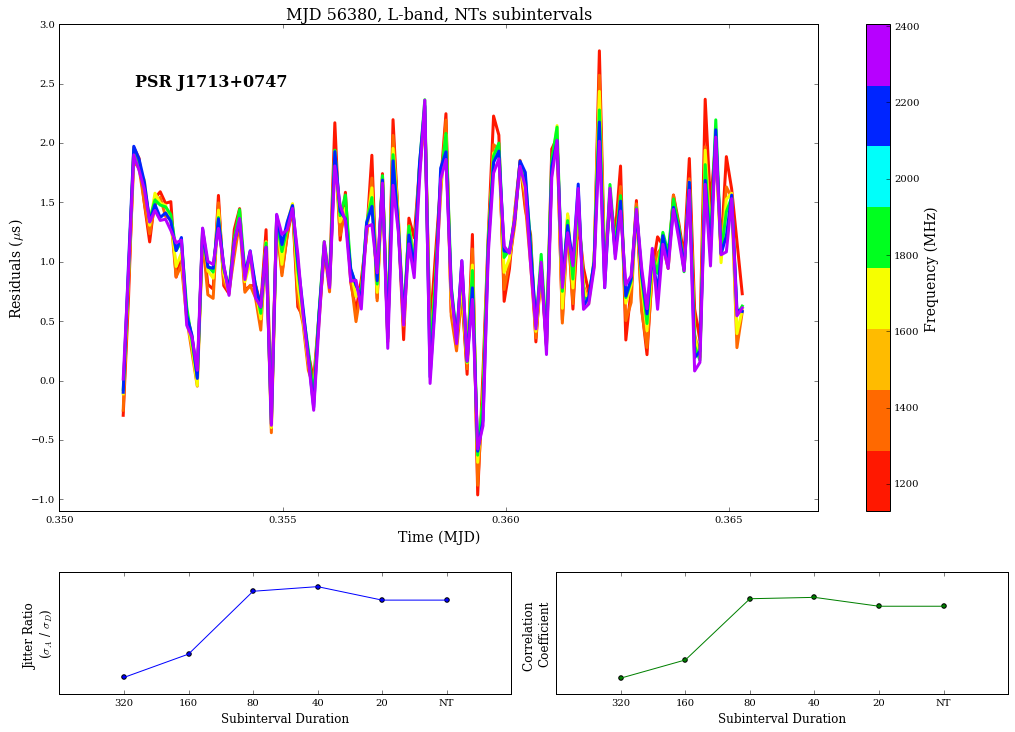

 writeGif(filename, images, duration=0.1, loops=0, dither=1)
    Write an animated gif from the specified images. 
    images should be a list of numpy arrays of PIL images.
    Numpy images of type float should have pixels between 0 and 1.
    Numpy images of other types are expected to have values between 0 and 255.
    
6 frames written
J1713+0747_56380.gif


In [908]:
jitter_gif("J1713+0747", "56380", 56380.35, 56380.367, (0.35, 0.367), (-1.1, 3.0))